# Capstone 3 -  2 Exploratory Data Analysis (EDA)

## 2.1 Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import folium

sns.set()

## 2.2 Load The 'Olist' E-Commerce Dataset

In [2]:
df = pd.read_csv(r'C:\Users\JIYOON JUNG\Desktop\Springboard\Unit 32 Advanced Data Visualization\Capstone 3\df')

In [4]:
df.shape

(100196, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100196 entries, 0 to 100195
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       100196 non-null  object 
 1   customer_id                    100196 non-null  object 
 2   order_status                   100196 non-null  object 
 3   order_purchase_timestamp       100196 non-null  object 
 4   order_estimated_delivery_date  100196 non-null  object 
 5   product_id                     100196 non-null  object 
 6   seller_id                      100196 non-null  object 
 7   shipping_limit_date            100196 non-null  object 
 8   price                          100196 non-null  float64
 9   freight_value                  100196 non-null  float64
 10  customer_unique_id             100196 non-null  object 
 11  customer_zip_code_prefix       100196 non-null  int64  
 12  customer_city                 

In [6]:
# Change the datetypes
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100196 entries, 0 to 100195
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       100196 non-null  object        
 1   customer_id                    100196 non-null  object        
 2   order_status                   100196 non-null  object        
 3   order_purchase_timestamp       100196 non-null  datetime64[ns]
 4   order_estimated_delivery_date  100196 non-null  datetime64[ns]
 5   product_id                     100196 non-null  object        
 6   seller_id                      100196 non-null  object        
 7   shipping_limit_date            100196 non-null  datetime64[ns]
 8   price                          100196 non-null  float64       
 9   freight_value                  100196 non-null  float64       
 10  customer_unique_id             100196 non-null  object        
 11  

## 2.3 Explore The Data

In [9]:
# Explore the numeric data
df.describe().T

count          mean           std          min  \
price                     100196.0    123.751681    187.654634     0.850000   
freight_value             100196.0     20.069096     15.780795     0.000000   
customer_zip_code_prefix  100196.0  35138.788614  29832.009608  1003.000000   
geolocation_lat            99899.0    -21.212228      5.591800   -33.690972   
geolocation_lng            99899.0    -46.192769      4.050417   -72.670987   
order_size                100196.0      1.198202      0.653297     1.000000   
product_order_size        100196.0      1.099814      0.456291     1.000000   
Year                      100196.0   2017.543854      0.503675  2016.000000   
Month                     100196.0      6.037367      3.228565     1.000000   
product_sales_amt         100196.0    131.956347    203.630690     0.850000   
order_sales_amt           100196.0    139.940672    210.822529     0.850000   

                                   25%           50%           75%  \
price                        40.000000     78.000000    139.000000   
freight_value                13.140000     16.320000     21.190000   
customer_zip_code_prefix  11320.000000  24416.000000  59014.250000   
geolocation_lat             -23.589994    -22.925419    -20.143995   
geolocation_lng             -48.108535    -46.632972    -43.635422   
order_size                    1.000000      1.000000      1.000000   
product_order_size            1.000000      1.000000      1.000000   
Year                       2017.000000   2018.000000   2018.000000   
Month                         3.000000      6.000000      8.000000   
product_sales_amt            44.900000     80.000000    146.990000   
order_sales_amt              47.565000     89.180000    152.000000   

                                   max  
price                      6735.000000  
freight_value               409.680000  
customer_zip_code_prefix  99980.000000  
geolocation_lat              42.184003  
geolocation_lng              -7.738207  
order_size                   21.000000  
product_order_size           20.000000  
Year                       2018.000000  
Month                        12.000000  
product_sales_amt         13440.000000  
order_sales_amt           13440.000000

### 2.3.1 Sales Trend

#### 2.3.1.1 Monthly Sales Trend

In [19]:
total_sales = df.groupby(by=['Year','Month'])["product_sales_amt"].sum()
total_qty = df.groupby(by=['Year','Month'])["product_order_size"].sum()
revenue_per_item = (total_sales / total_qty).round(2)
order_size = (total_qty / df.groupby(by=['Year','Month'])['order_id'].nunique()).round(2)

sales = pd.DataFrame(
    {'Total_Sales': total_sales,
     'Total_Qty': total_qty,
     'Revenue_per_Item': revenue_per_item,
     'Order_Size': order_size})

sales

Total_Sales  Total_Qty  Revenue_per_Item  Order_Size
Year Month                                                      
2016 9           134.97          3             44.99        3.00
     10        40325.11        313            128.83        1.18
     12           10.90          1             10.90        1.00
2017 1        111798.36        913            122.45        1.22
     2        234223.40       1858            126.06        1.12
     3        359198.85       2897            123.99        1.14
     4        340669.68       2569            132.61        1.12
     5        489338.25       4004            122.21        1.13
     6        421923.37       3489            120.93        1.11
     7        481604.52       4416            109.06        1.14
     8        554699.70       4797            115.63        1.14
     9        607399.67       4737            128.22        1.14
     10       648247.65       5214            124.33        1.16
     11       987765.37       8475            116.55        1.16
     12       726033.19       6187            117.35        1.12
2018 1        924645.00       8037            115.05        1.14
     2        826437.13       7518            109.93        1.15
     3        953356.25       8017            118.92        1.14
     4        973534.09       7827            124.38        1.15
     5        977544.69       7810            125.17        1.16
     6        856077.86       7010            122.12        1.15
     7        867953.46       6963            124.65        1.13
     8        838576.64       7142            117.41        1.12

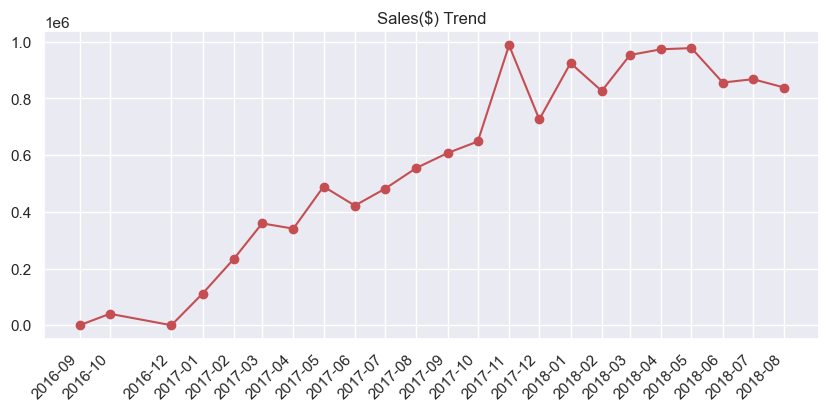

In [20]:
# Convert the multi-index into a datetime index
sales.index = pd.to_datetime(sales.index.map(lambda x: f"{x[0]}-{x[1]}-01"))

x_values = sales.index
y_values = sales['Total_Sales'].values
fig, ax = plt.subplots(figsize=(10, 4)) 
ax.plot(x_values, y_values, marker='o', linestyle='-', color='r')
ax.set_xticks(x_values) 
ax.set_xticklabels([label.strftime('%Y-%m') for label in x_values], rotation=45, ha="right") 
ax.set(title="Sales($) Trend")
plt.show()

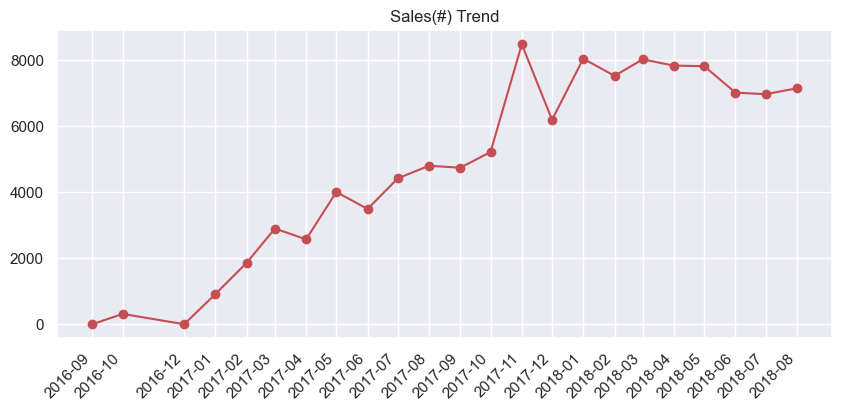

In [21]:
x_values = sales.index
y_values = sales['Total_Qty'].values
fig, ax = plt.subplots(figsize=(10, 4)) 
ax.plot(x_values, y_values, marker='o', linestyle='-', color='r')
ax.set_xticks(x_values) 
ax.set_xticklabels([label.strftime('%Y-%m') for label in x_values], rotation=45, ha="right") 
ax.set(title="Sales(#) Trend")
plt.show()

#### 2.3.1.2 Daily Sales Trend

In [22]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_purchase_timestamp'] = df['order_purchase_timestamp'].dt.strftime('%Y-%m-%d')

In [24]:
total_sales_day = df.groupby(by = "order_purchase_timestamp")["product_sales_amt"].sum()
total_qty_day = df.groupby(by='order_purchase_timestamp')["product_order_size"].sum()
revenue_per_item_day = (df.groupby(by='order_purchase_timestamp')["product_sales_amt"].sum()/ df.groupby(by='order_purchase_timestamp')["product_order_size"].sum()).round(2)
order_size_day = (df.groupby(by='order_purchase_timestamp')["product_order_size"].sum()/df.groupby(by='order_purchase_timestamp')["order_id"].nunique()).round(2)

sales_day = pd.DataFrame(
    {'Total_Sales': total_sales_day,
     'Total_Qty': total_qty_day,
     'Revenue_per_Item': revenue_per_item_day,
     'Order_Size': order_size_day}).reset_index()
sales_day

order_purchase_timestamp  Total_Sales  Total_Qty  Revenue_per_Item  \
0                 2016-09-15       134.97          3             44.99   
1                 2016-10-03       441.98          7             63.14   
2                 2016-10-04      8595.89         63            136.44   
3                 2016-10-05      6169.77         48            128.54   
4                 2016-10-06      5889.96         47            125.32   
..                       ...          ...        ...               ...   
607               2018-08-25     10599.41         75            141.33   
608               2018-08-26      8070.71         82             98.42   
609               2018-08-27      5345.91         71             75.29   
610               2018-08-28      3673.91         45             81.64   
611               2018-08-29      1546.04         16             96.63   

     Order_Size  
0          3.00  
1          1.00  
2          1.17  
3          1.37  
4          1.15  
..          ...  
607        1.09  
608        1.12  
609        1.08  
610        1.15  
611        1.45  

[612 rows x 5 columns]

In [25]:
sales_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_purchase_timestamp  612 non-null    object 
 1   Total_Sales               612 non-null    float64
 2   Total_Qty                 612 non-null    int64  
 3   Revenue_per_Item          612 non-null    float64
 4   Order_Size                612 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 24.0+ KB


In [26]:
sales_day['order_purchase_timestamp'] = pd.to_datetime(sales_day['order_purchase_timestamp'])

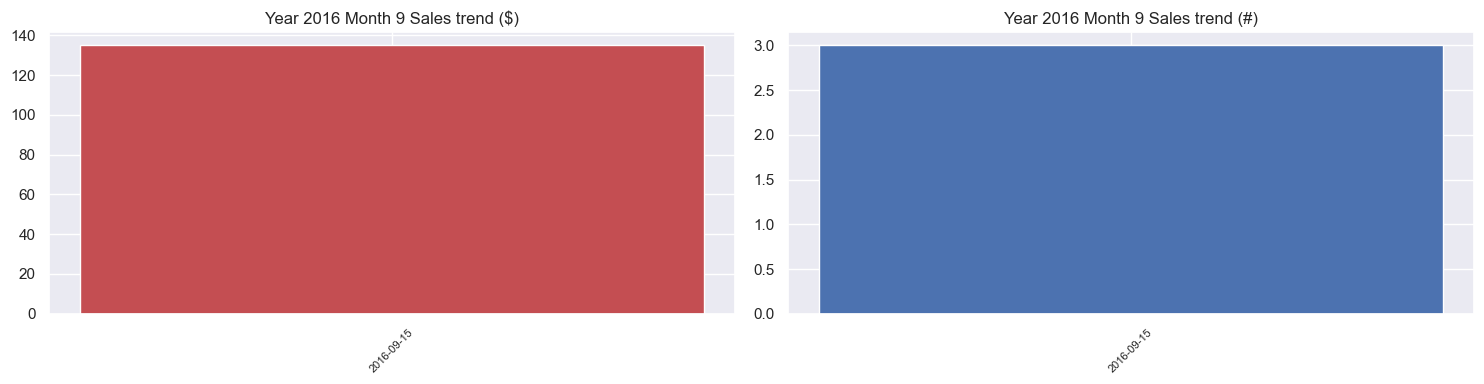

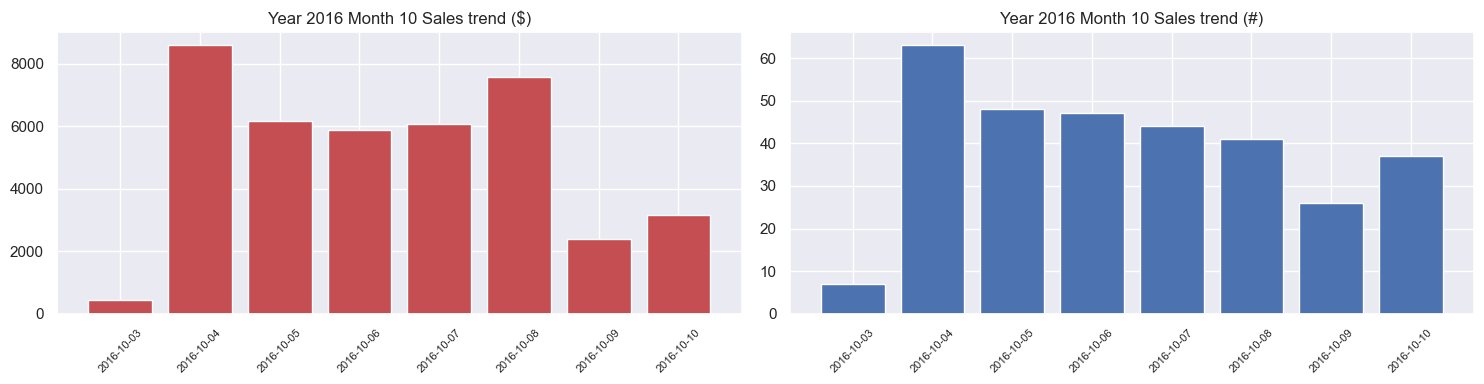

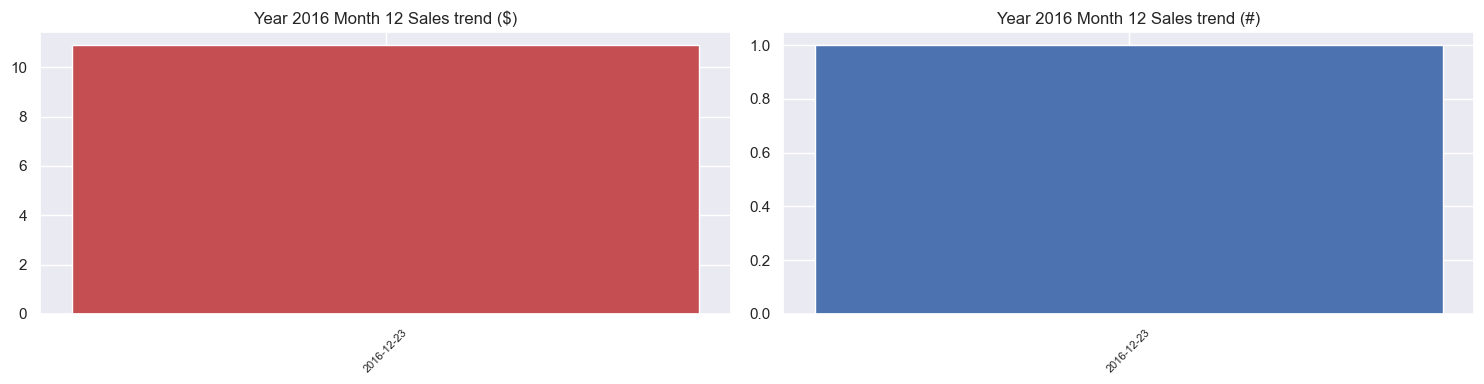

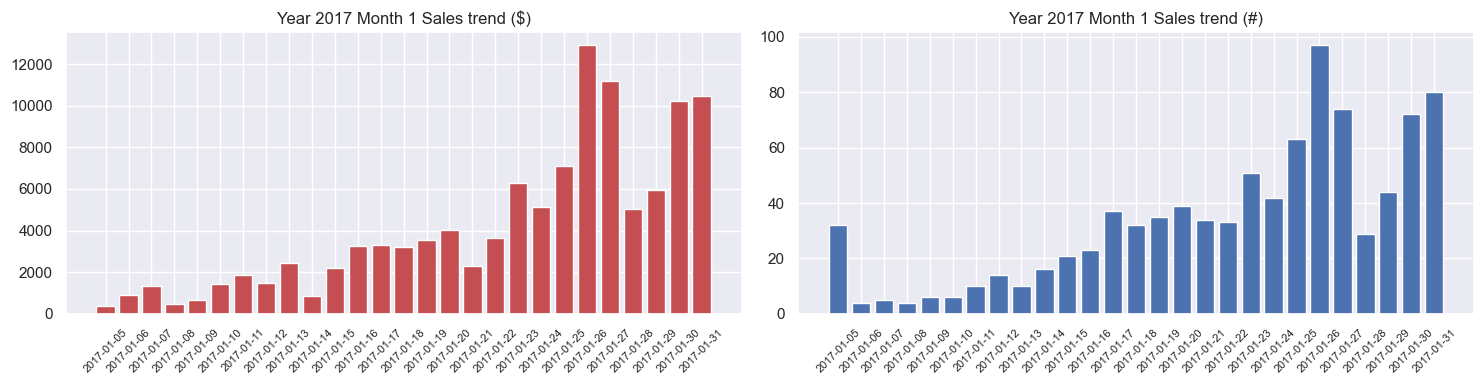

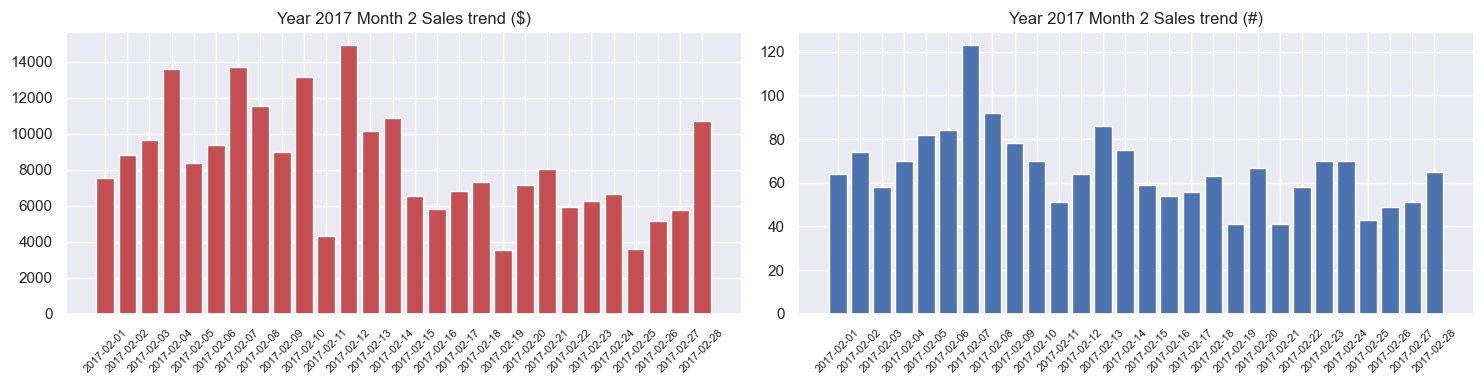

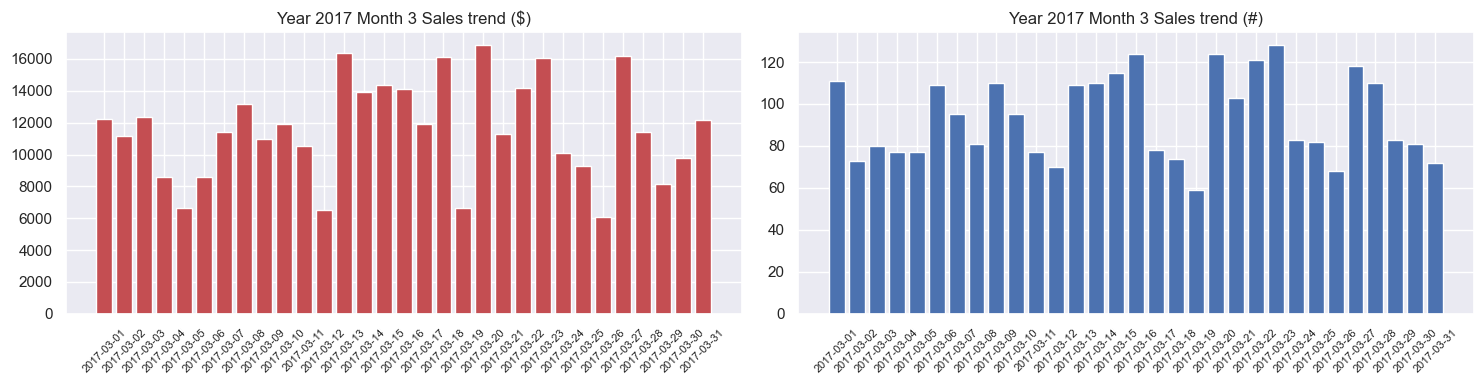

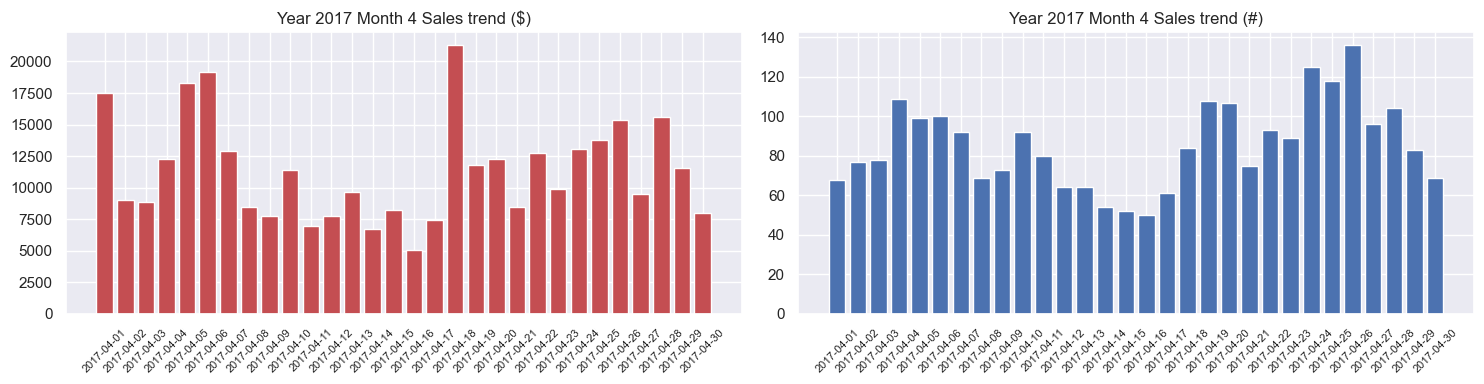

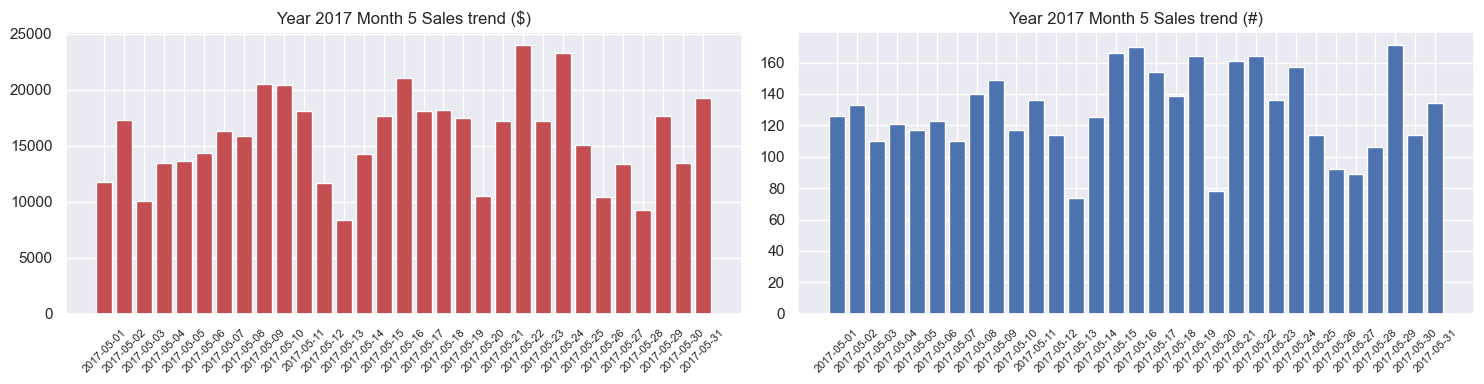

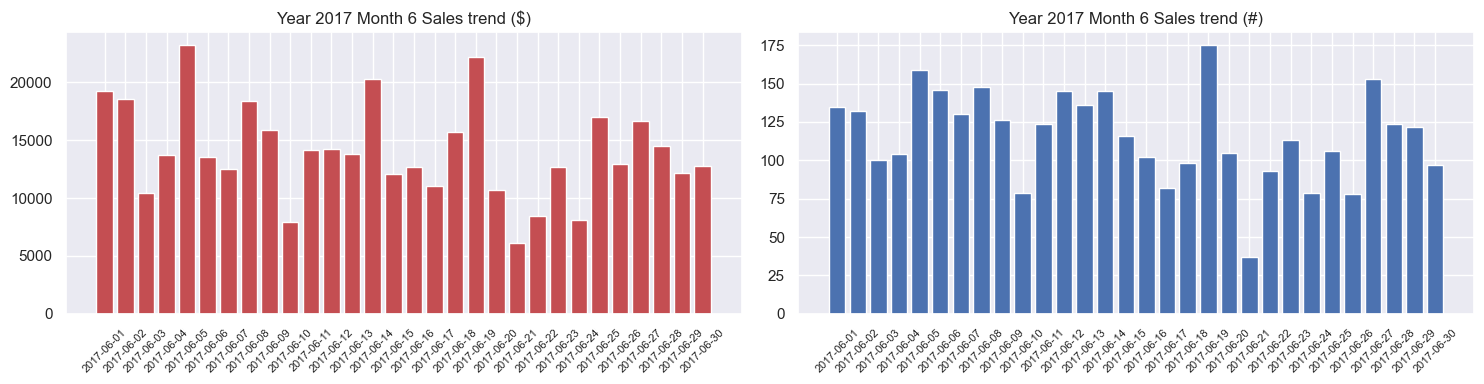

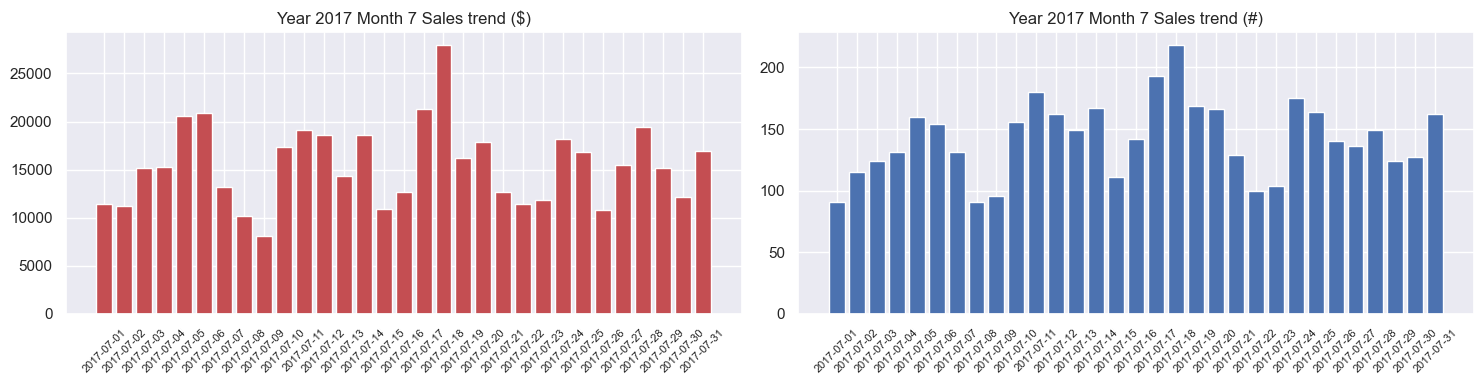

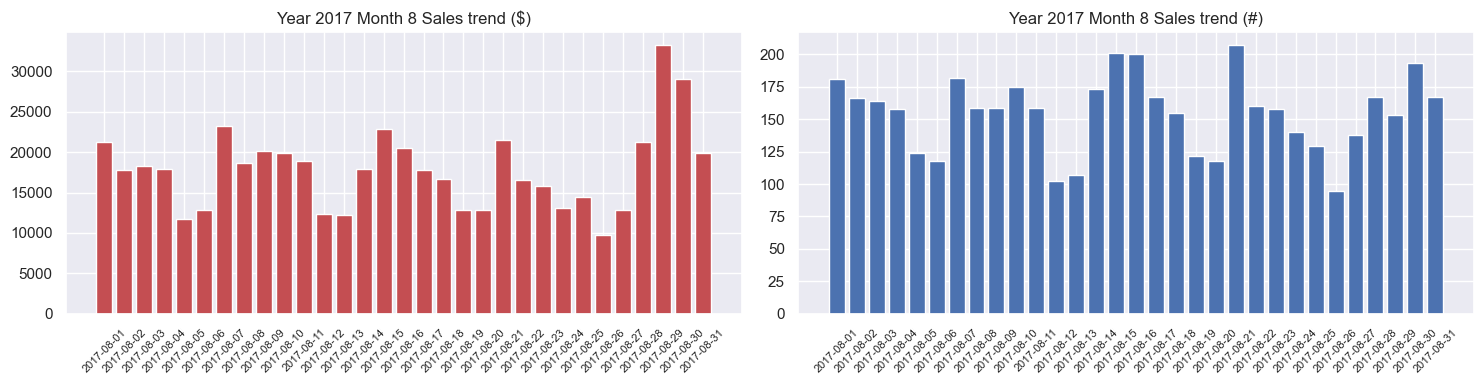

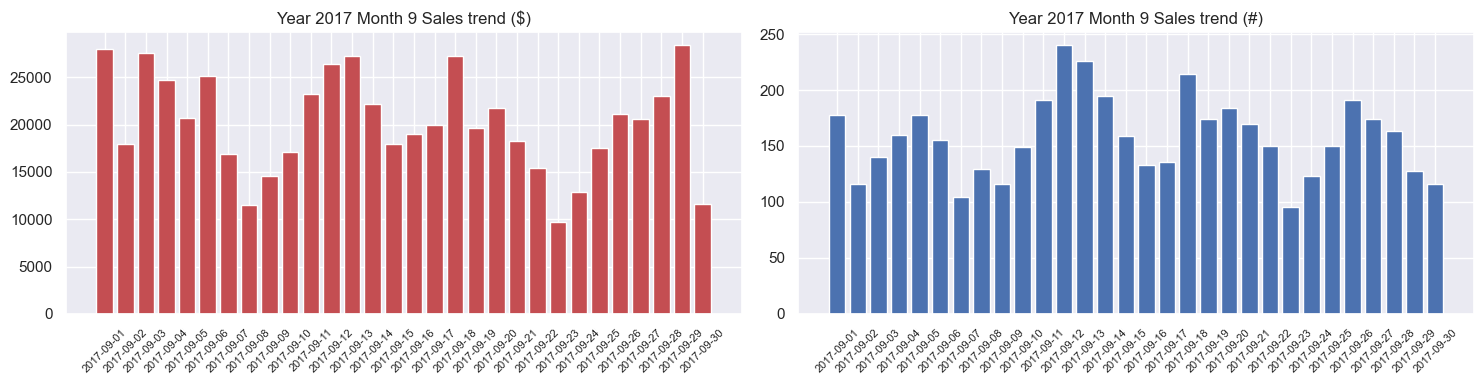

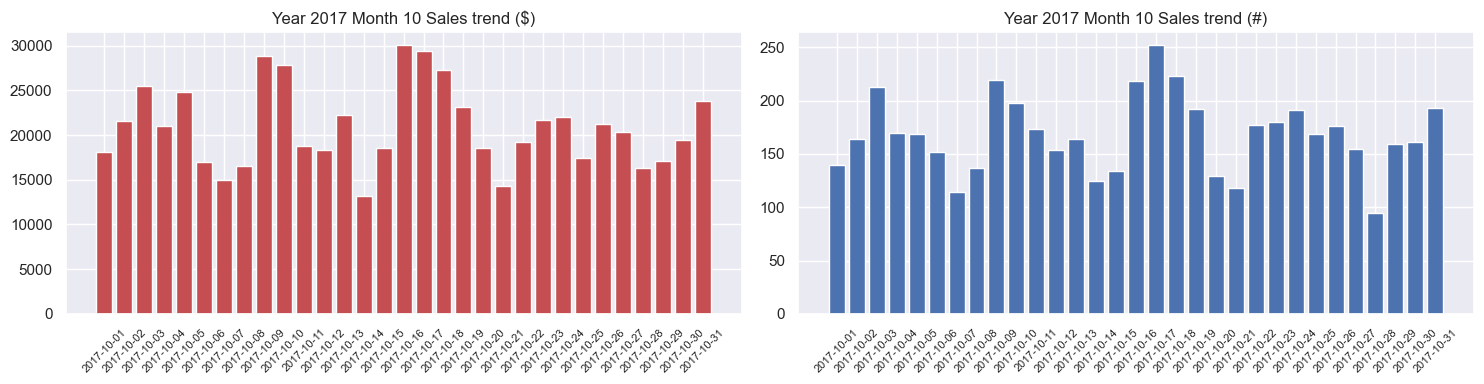

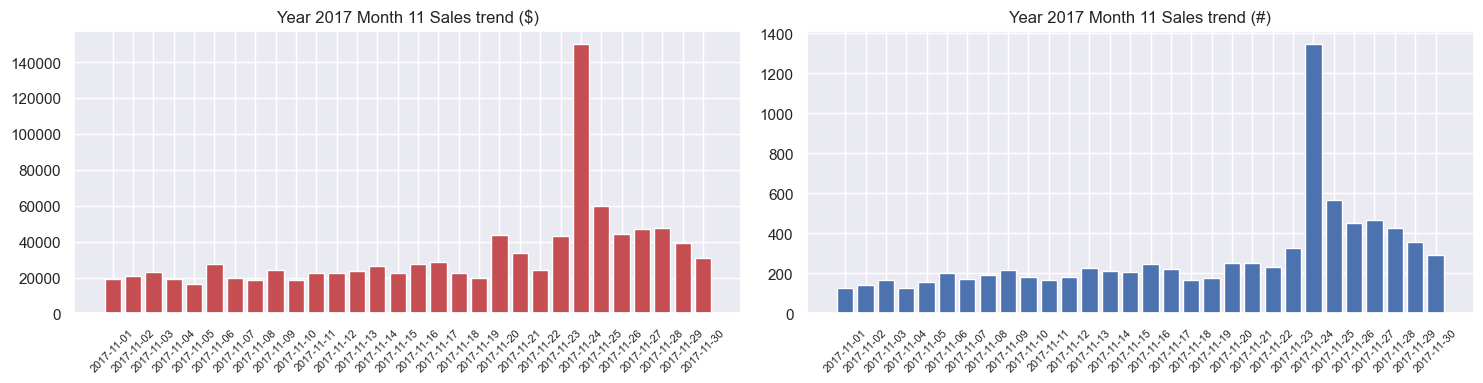

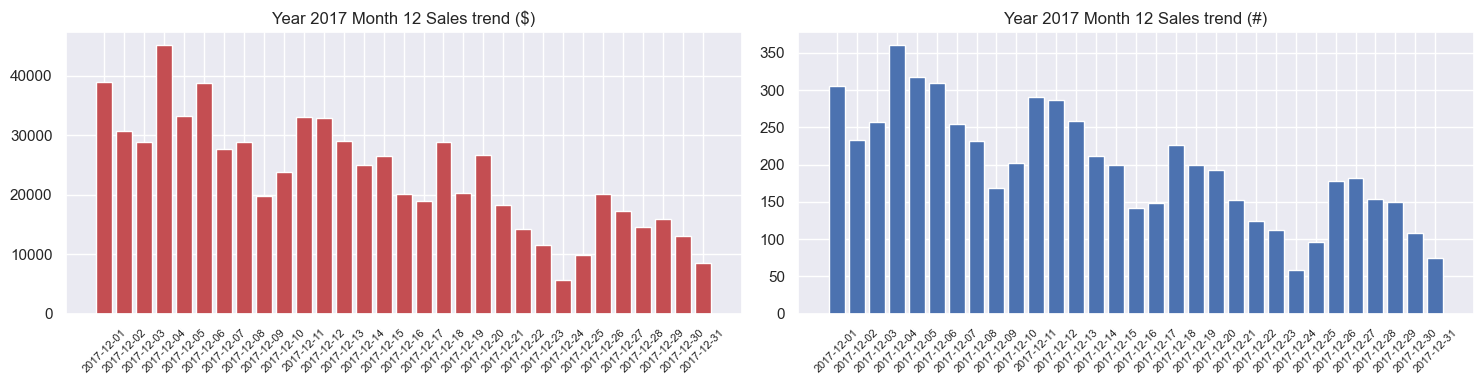

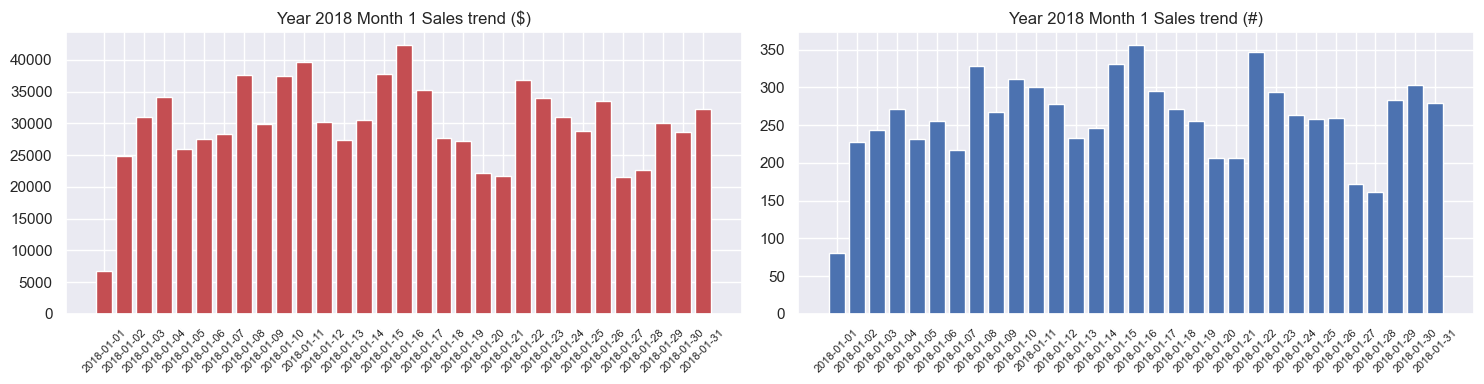

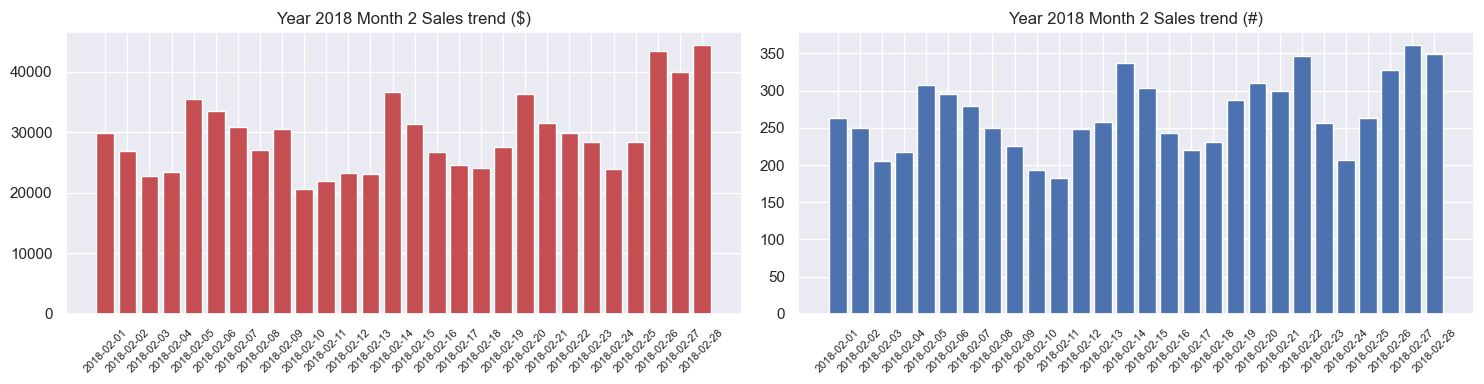

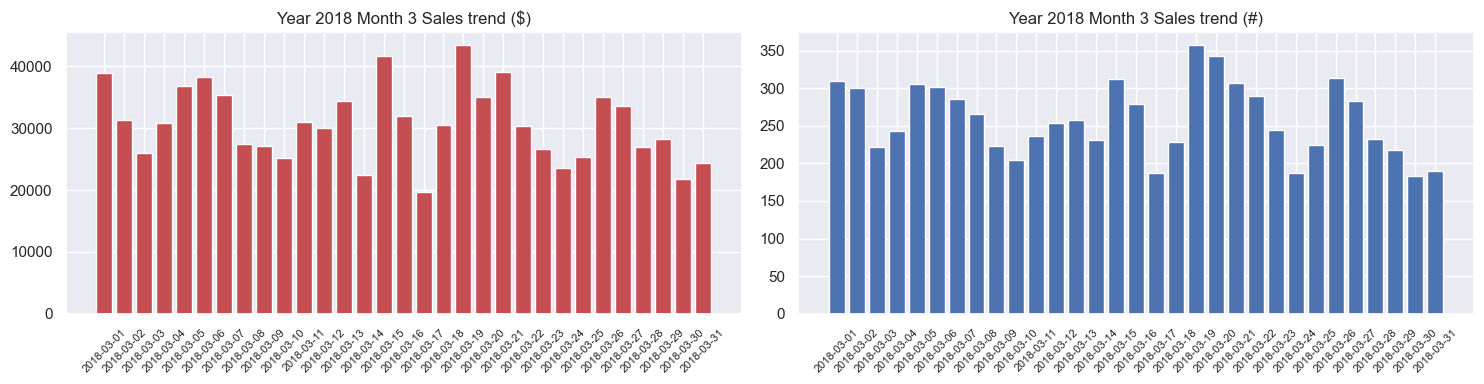

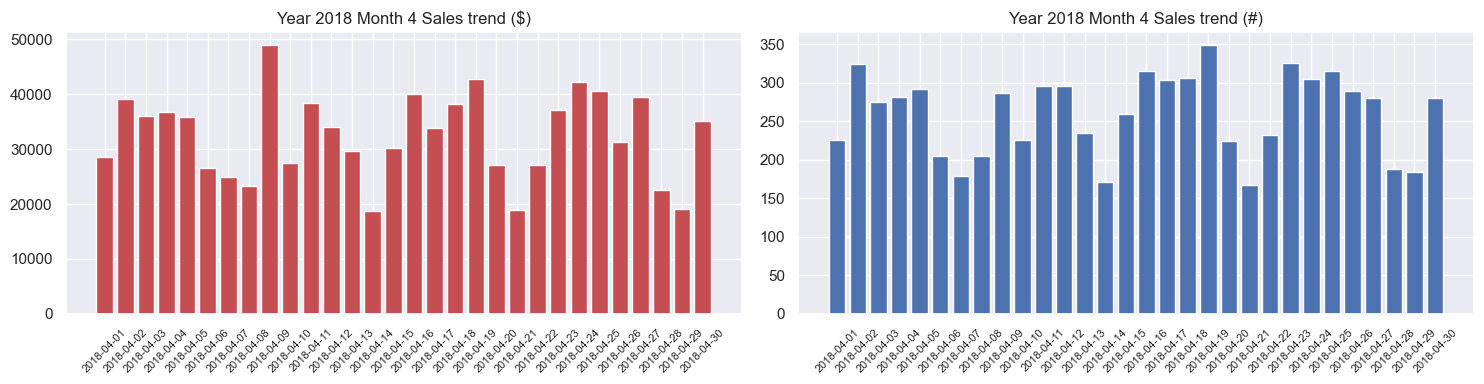

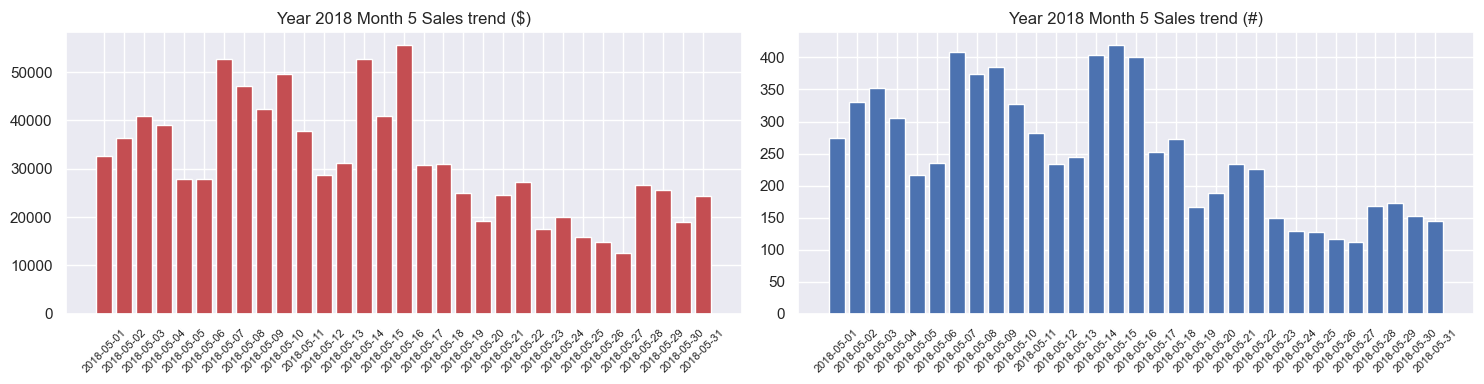

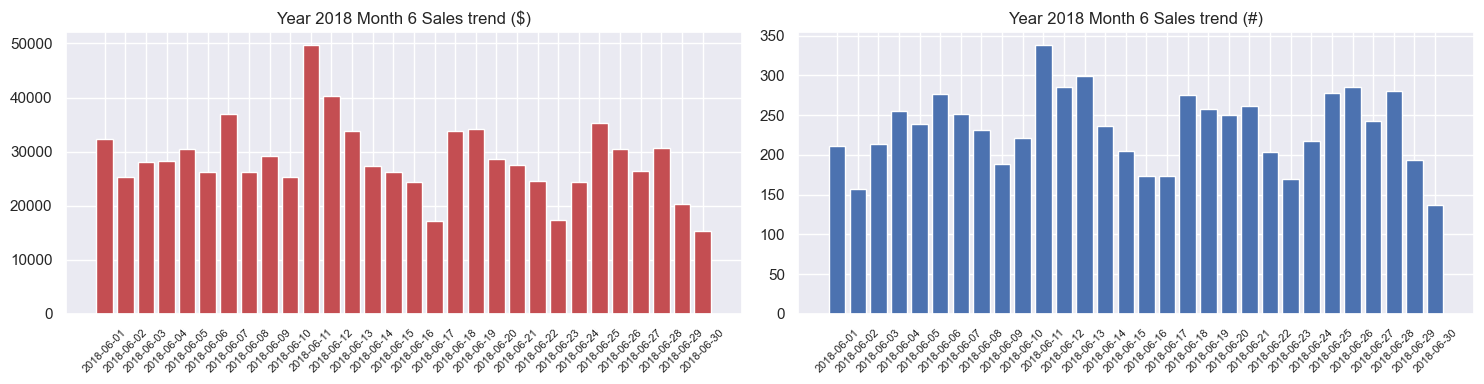

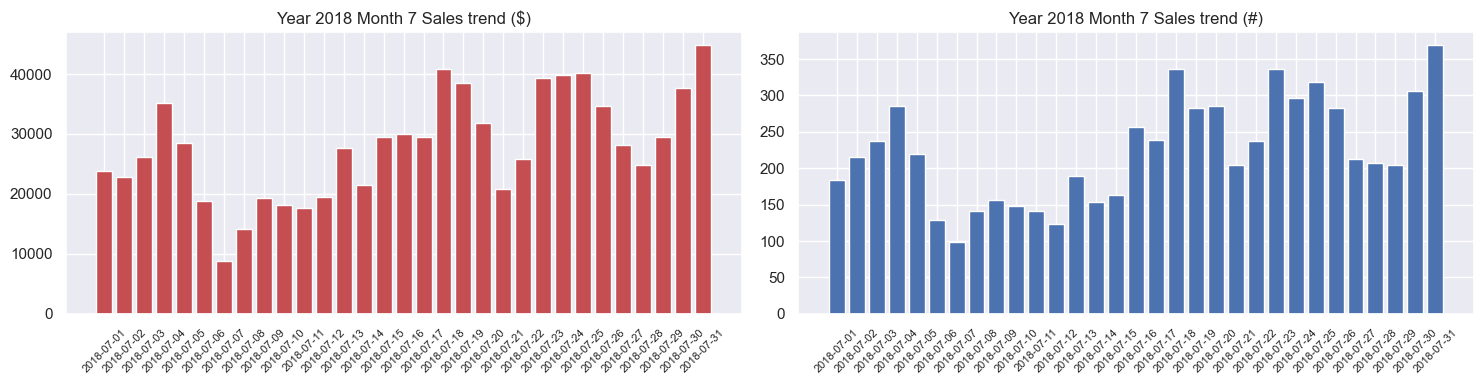

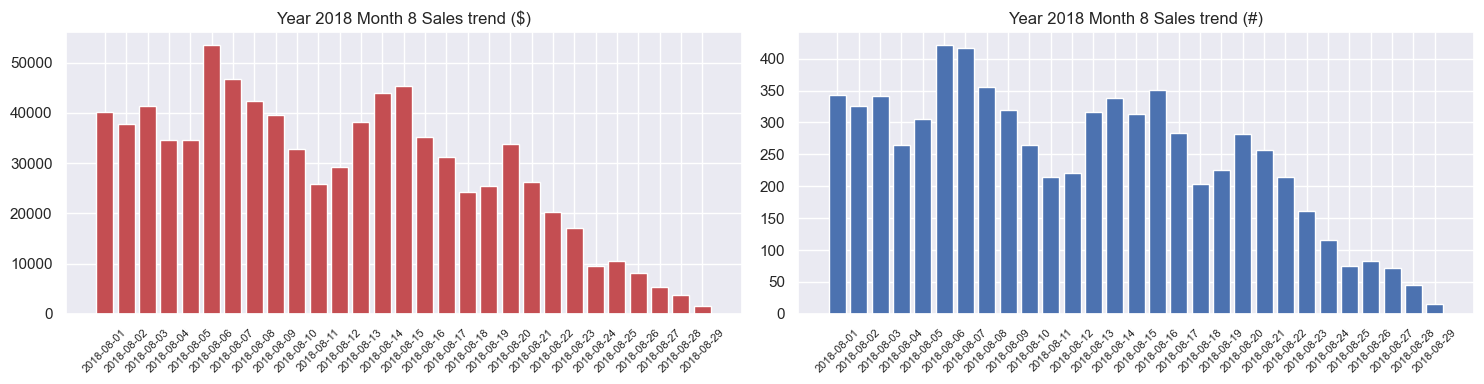

In [27]:
# Plot graphs that show the amount and quantity of daily sales, with the data for each month displayed in its own subplot.

# Extract unique years from the dataset
unique_years = sales_day['order_purchase_timestamp'].dt.year.unique()

for year in unique_years:
    for i in range(1, 13):
        # Filter data for each month and year
        filtered_data = sales_day[(sales_day['order_purchase_timestamp'].dt.month == i) &
                                  (sales_day['order_purchase_timestamp'].dt.year == year)]
        
        # If there's no data for this month/year, skip the rest of the loop
        if filtered_data.empty:
            continue
        
        date_strings = [date.strftime('%Y-%m-%d') for date in filtered_data['order_purchase_timestamp']]
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))  
        
        # First subplot - Total Sales
        y_values_sales = filtered_data['Total_Sales'].values
        ax1.bar(date_strings, y_values_sales, color='r')
        ax1.set_xticks(range(len(date_strings)))
        ax1.set_xticklabels(date_strings, size=8, rotation=45)
        ax1.set(title=f"Year {year} Month {i} Sales trend ($)")
    
        # Second subplot - Total Quantity
        y_values_qty = filtered_data['Total_Qty'].values
        ax2.bar(date_strings, y_values_qty, color='b')
        ax2.set_xticks(range(len(date_strings)))
        ax2.set_xticklabels(date_strings, size=8, rotation=45)
        ax2.set(title=f"Year {year} Month {i} Sales trend (#)")
        
        plt.tight_layout()
        plt.show()

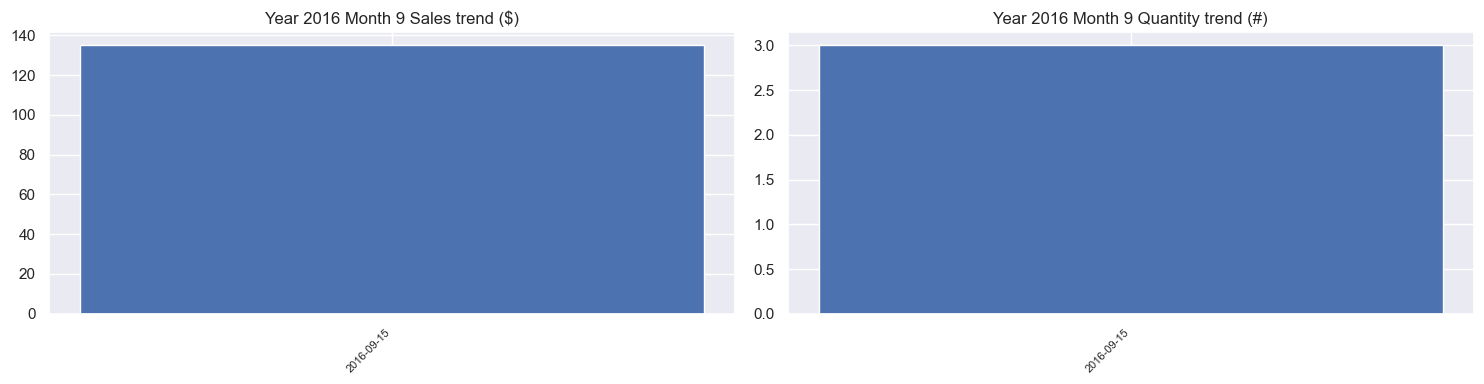

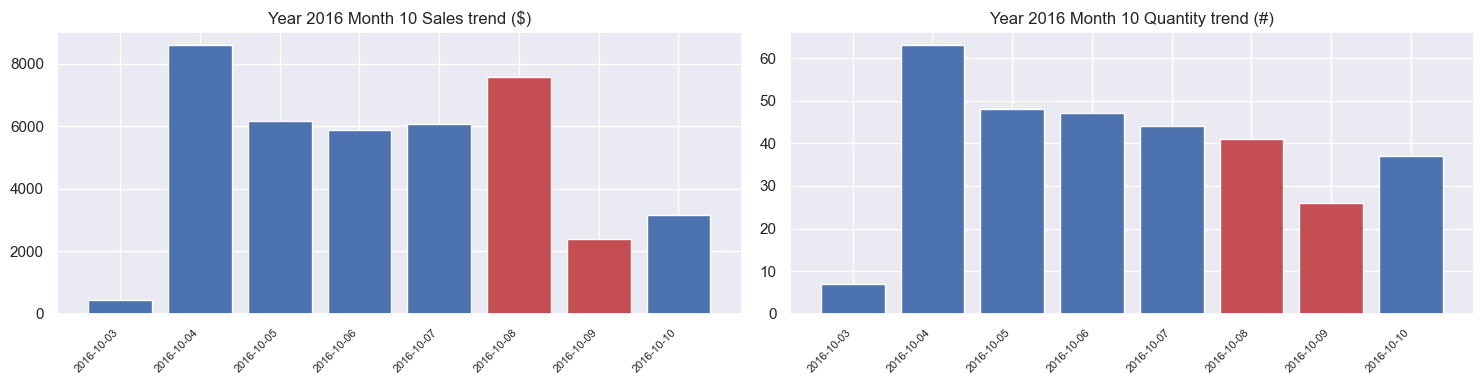

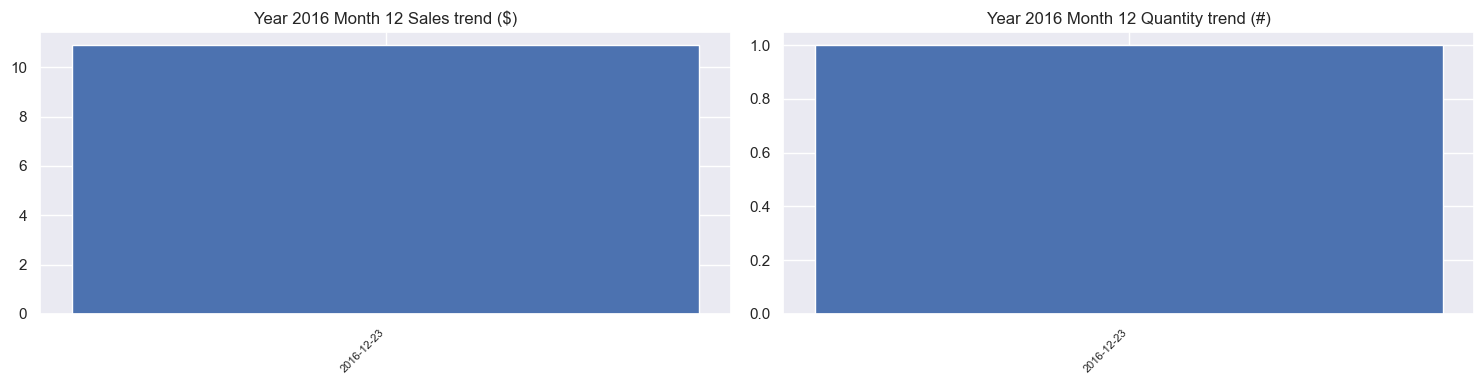

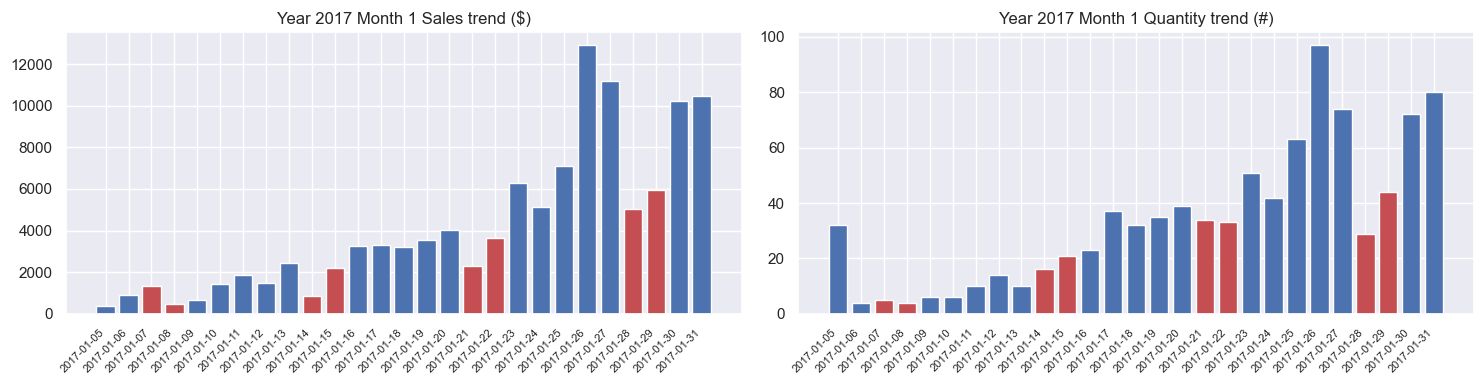

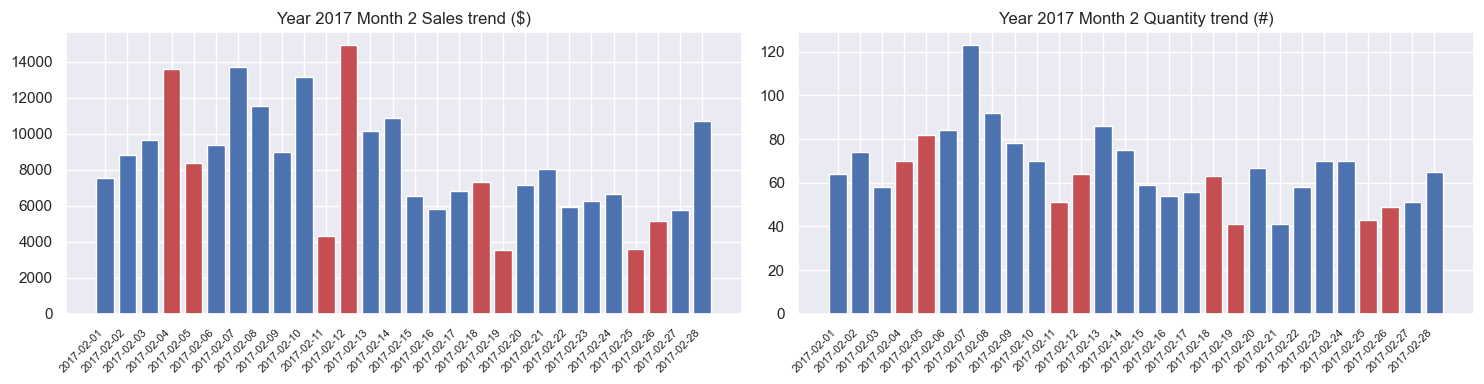

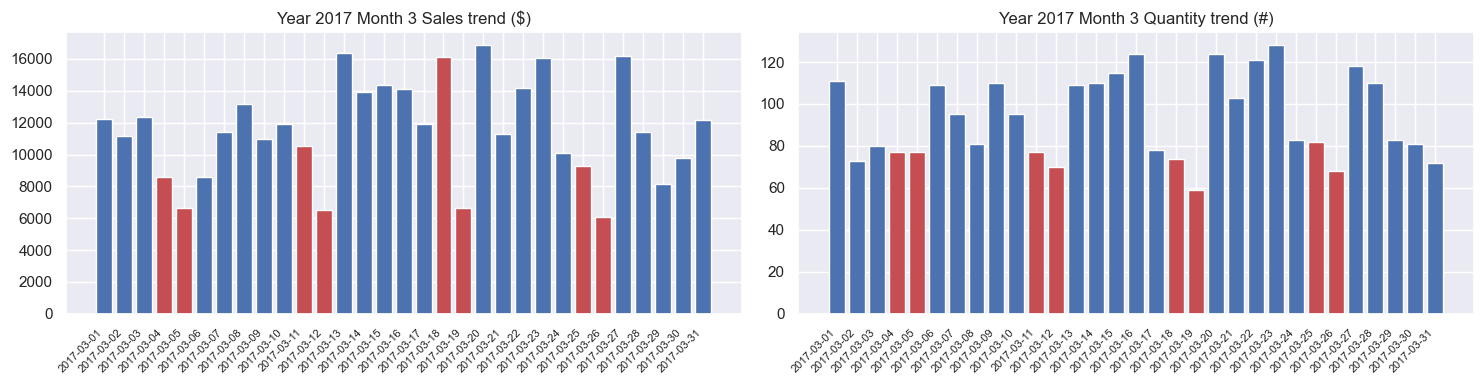

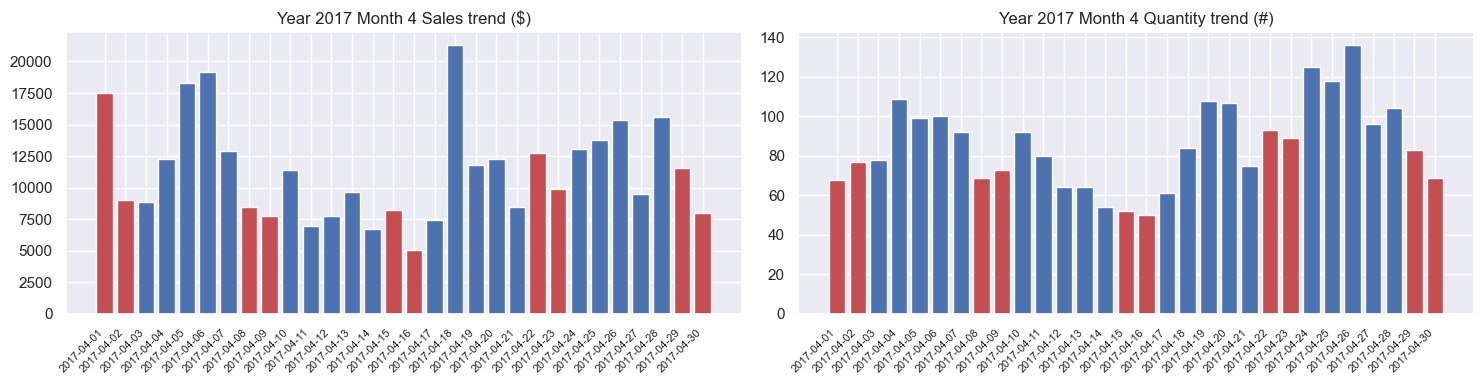

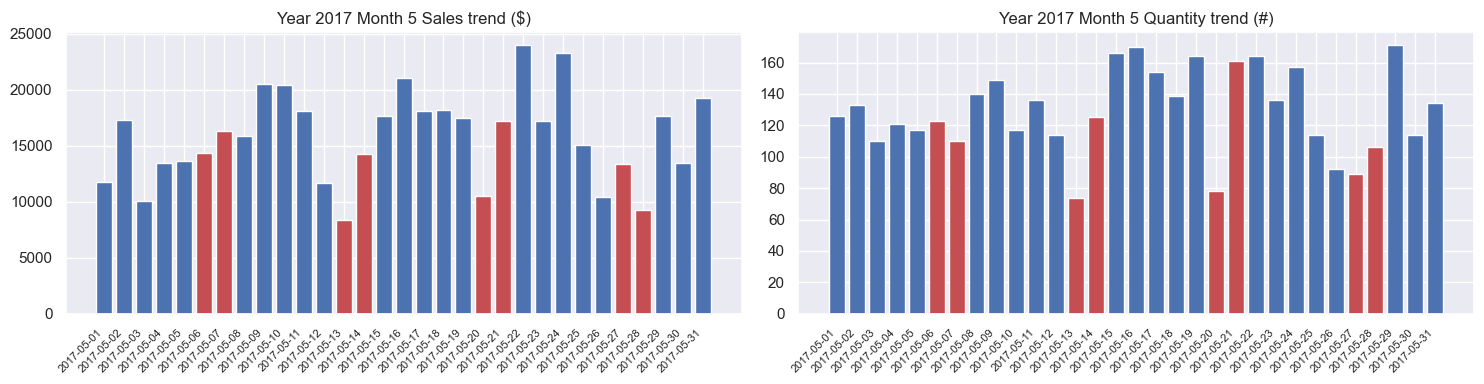

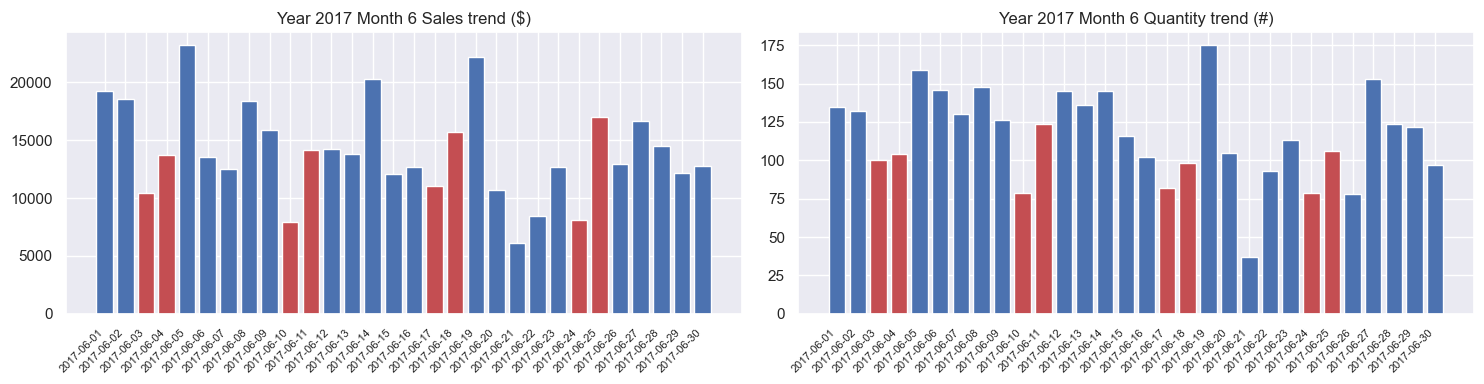

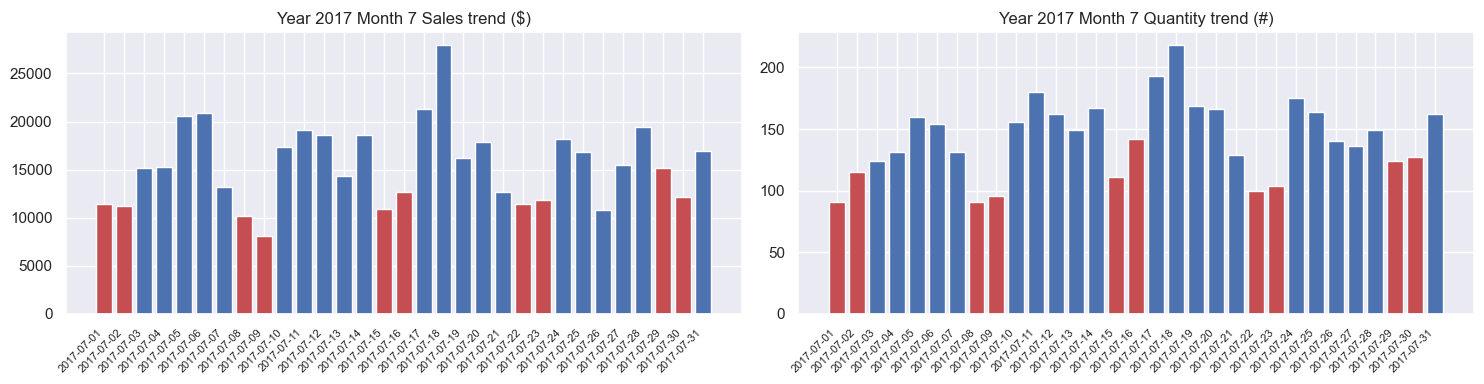

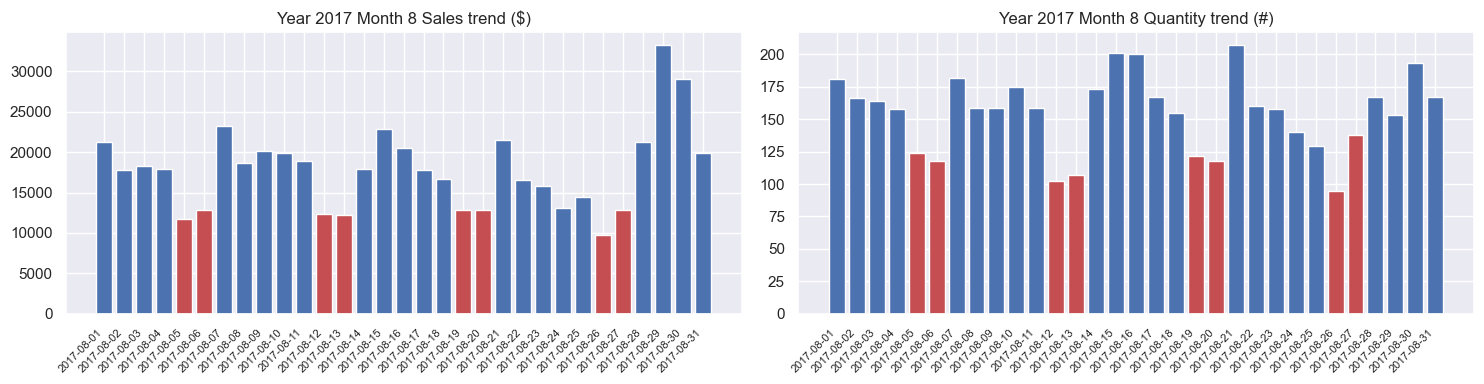

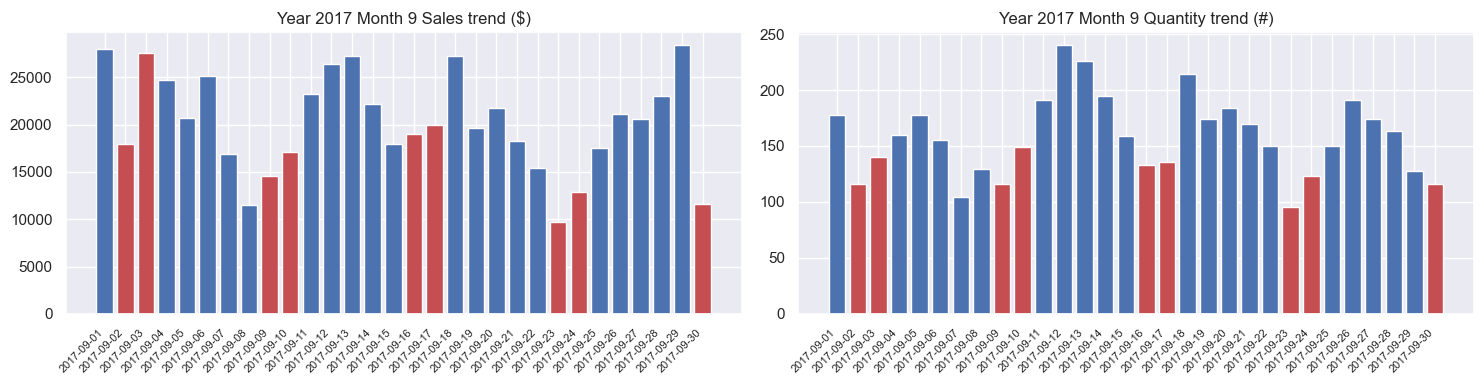

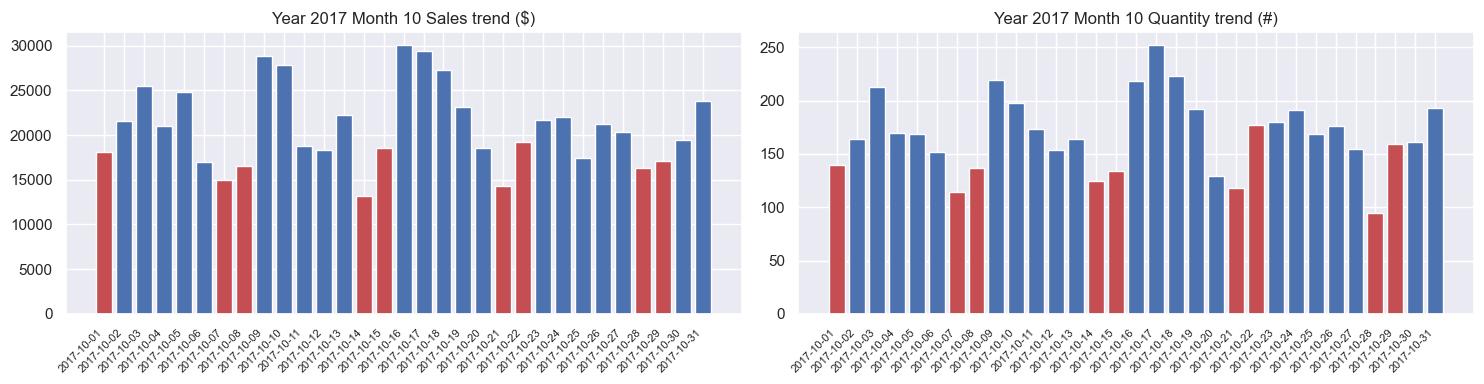

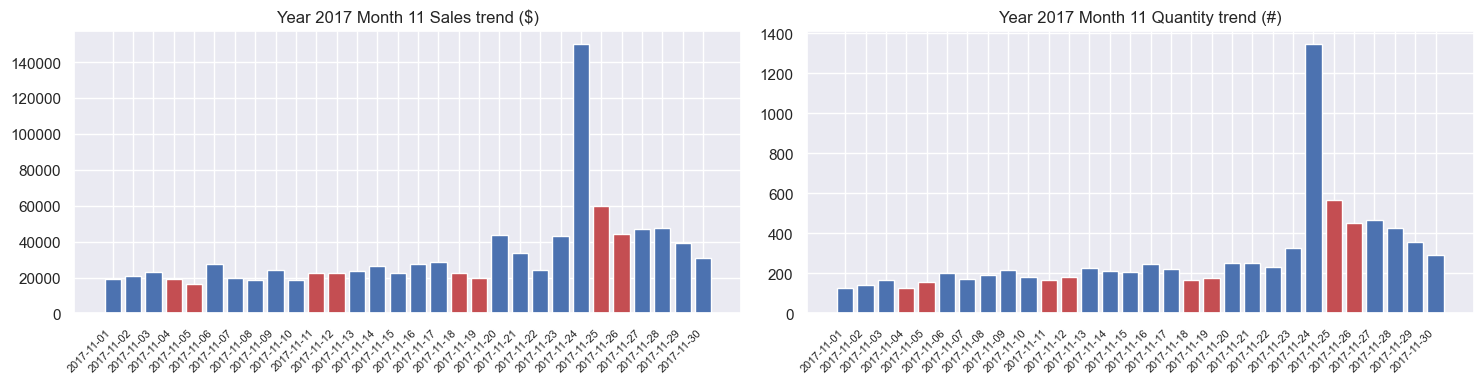

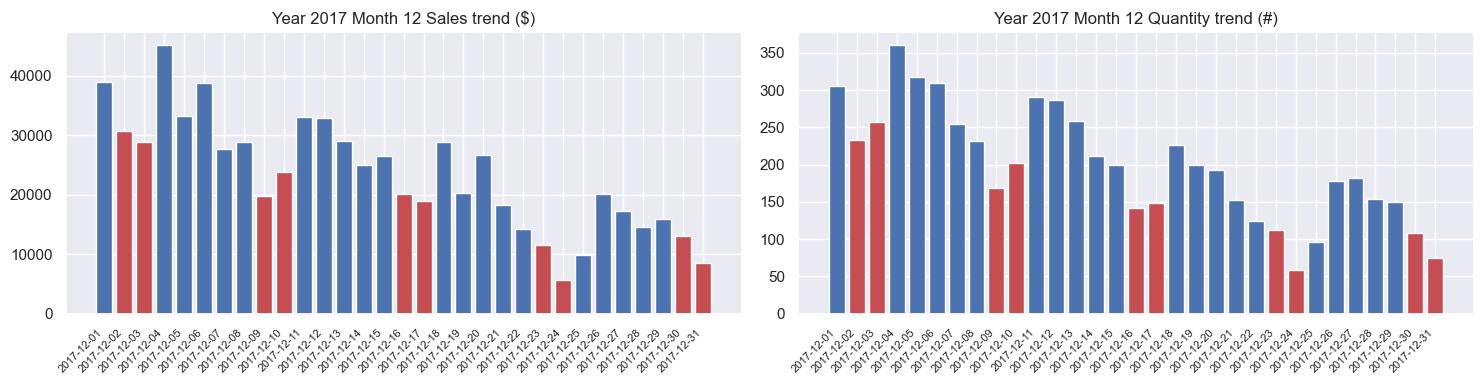

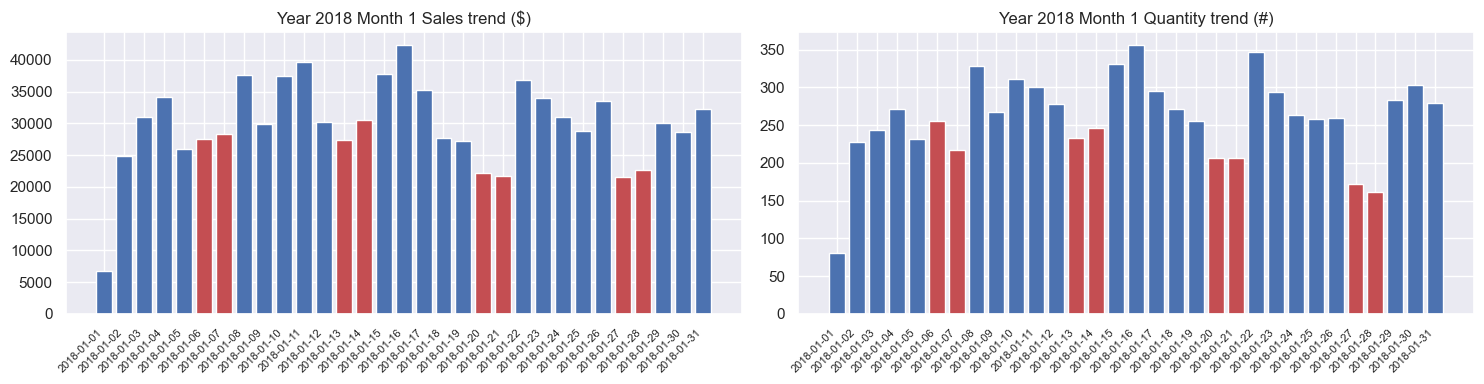

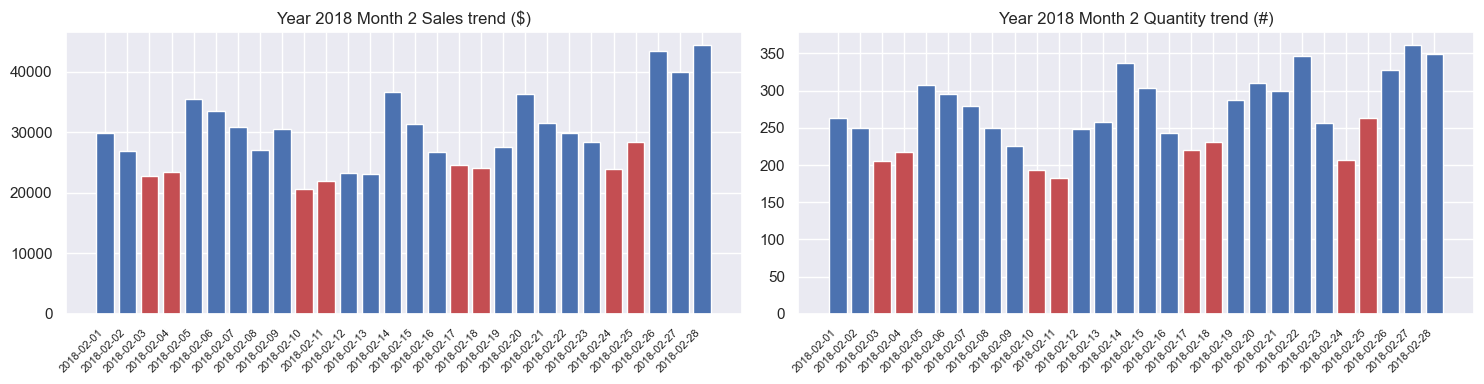

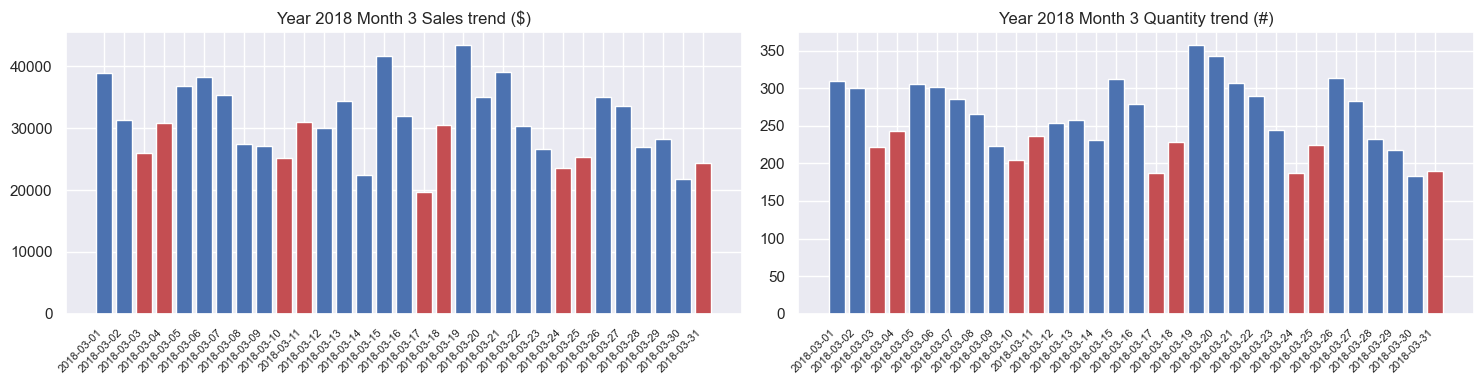

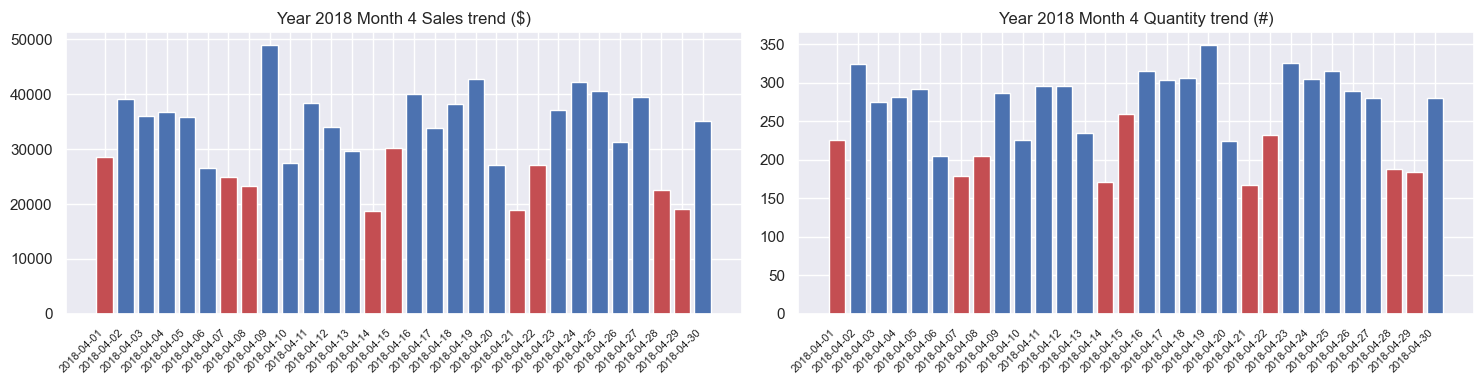

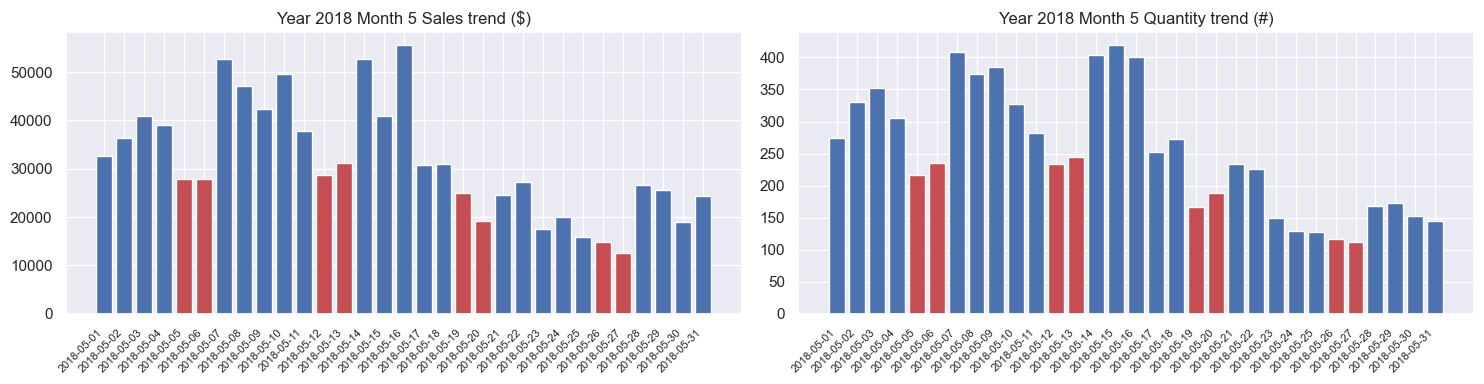

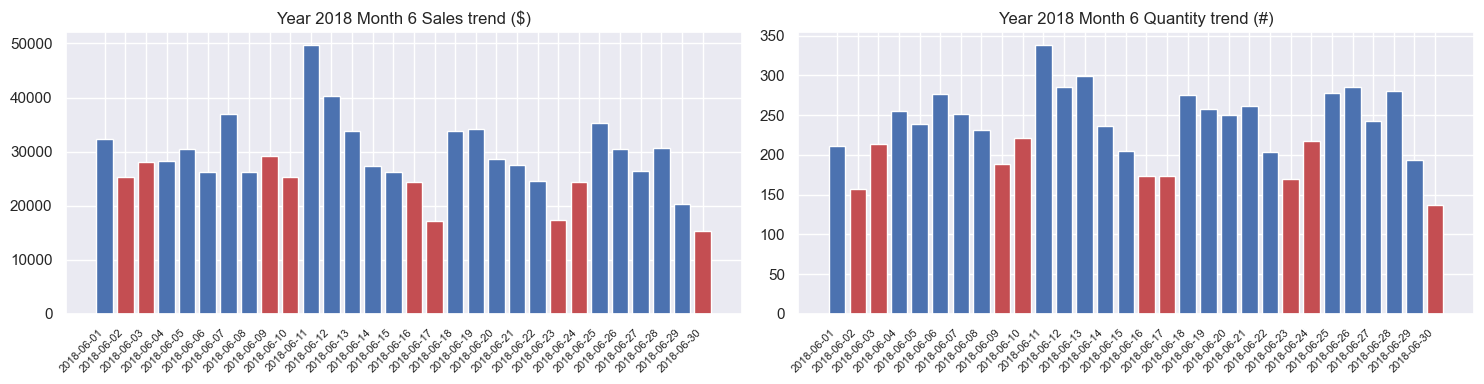

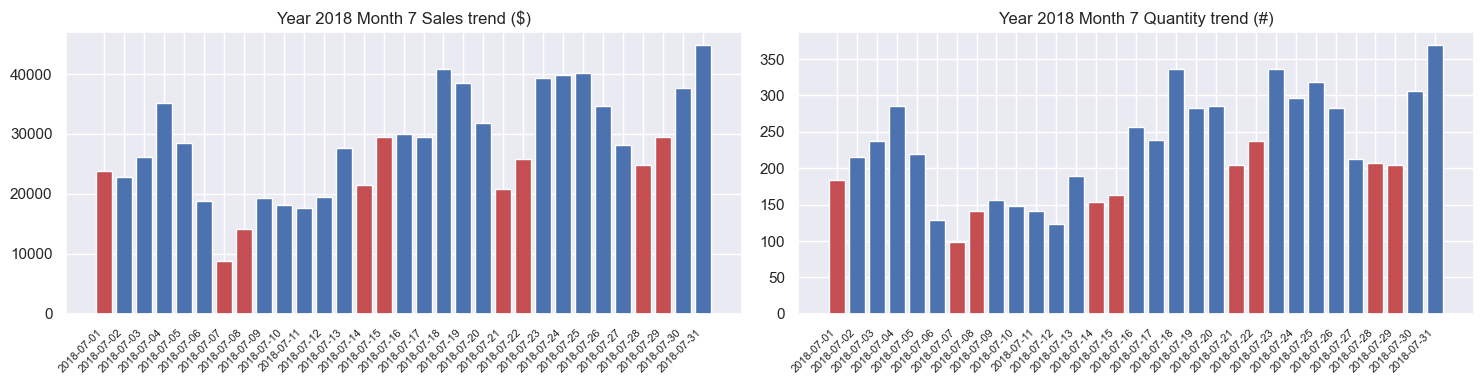

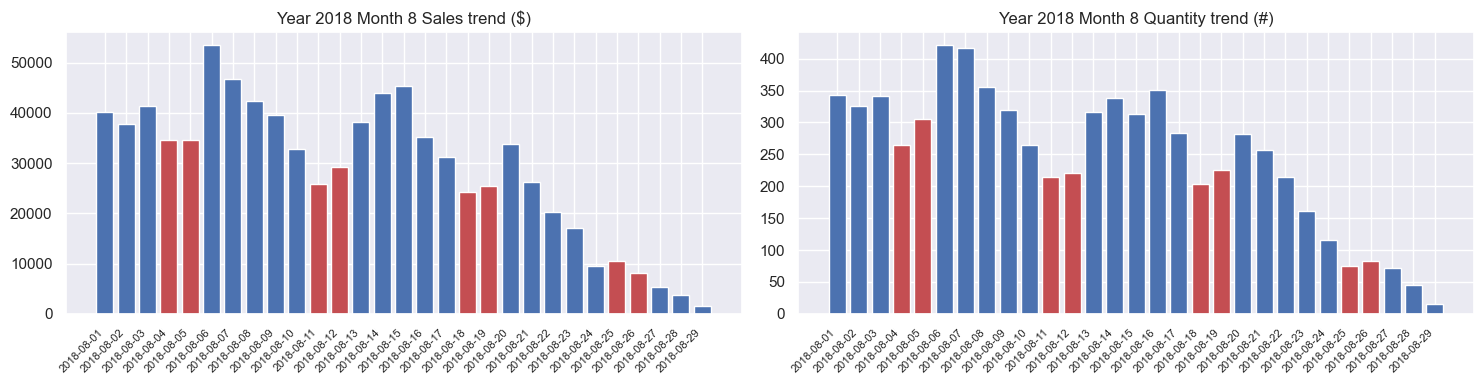

In [29]:
# Highlight the sales amount and quantity for the weekend in red.

# Extract unique years from the dataset
unique_years = sales_day['order_purchase_timestamp'].dt.year.unique()

for year in unique_years:
    for month in range(1, 13):
        # Filter data for each month and year
        filtered_data = sales_day[(sales_day['order_purchase_timestamp'].dt.month == month) & 
                                  (sales_day['order_purchase_timestamp'].dt.year == year)]
        
        if filtered_data.empty:
            continue
        
        # Extracting date strings for plotting
        date_strings = [date.strftime('%Y-%m-%d') for date in filtered_data['order_purchase_timestamp']]
        
        # Define colors for weekend (Saturday=5, Sunday=6) and weekday data
        colors = ['r' if day.weekday() >= 5 else 'b' for day in filtered_data['order_purchase_timestamp']]

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))  
        
        # First subplot - Total Sales trend
        ax1.bar(date_strings, filtered_data['Total_Sales'].values, color=colors)
        ax1.set_xticks(range(len(date_strings)))
        ax1.set_xticklabels(date_strings, size=8, rotation=45, ha='right')
        ax1.set(title=f"Year {year} Month {month} Sales trend ($)")
        
        # Second subplot - Total Quantity trend
        ax2.bar(date_strings, filtered_data['Total_Qty'].values, color=colors)
        ax2.set_xticks(range(len(date_strings)))
        ax2.set_xticklabels(date_strings, size=8, rotation=45, ha='right')
        ax2.set(title=f"Year {year} Month {month} Quantity trend (#)")
        
        plt.tight_layout()
        plt.show()

In [30]:
monday_sales = sales_day[sales_day['order_purchase_timestamp'].dt.weekday == 0]['Total_Sales']
tuesday_sales = sales_day[sales_day['order_purchase_timestamp'].dt.weekday == 1]['Total_Sales']
wednesday_sales = sales_day[sales_day['order_purchase_timestamp'].dt.weekday == 2]['Total_Sales']
thursday_sales = sales_day[sales_day['order_purchase_timestamp'].dt.weekday == 3]['Total_Sales']
friday_sales = sales_day[sales_day['order_purchase_timestamp'].dt.weekday == 4]['Total_Sales']
saturday_sales = sales_day[sales_day['order_purchase_timestamp'].dt.weekday == 5]['Total_Sales']
sunday_sales = sales_day[sales_day['order_purchase_timestamp'].dt.weekday == 6]['Total_Sales']

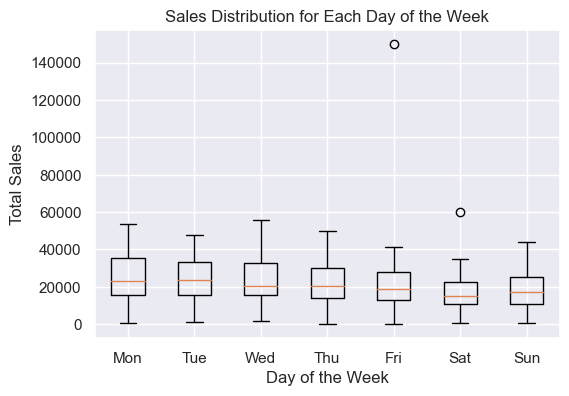

In [31]:
sales_data = [
    monday_sales, tuesday_sales, wednesday_sales,
    thursday_sales, friday_sales, saturday_sales, sunday_sales
]

# Plotting the boxplot
plt.figure(figsize=(6, 4))
plt.boxplot(sales_data)
plt.title('Sales Distribution for Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(range(1, 8), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.show()

In [32]:
monday_sales_Q = sales_day[sales_day['order_purchase_timestamp'].dt.weekday == 0]['Total_Qty']
tuesday_sales_Q = sales_day[sales_day['order_purchase_timestamp'].dt.weekday == 1]['Total_Qty']
wednesday_sales_Q = sales_day[sales_day['order_purchase_timestamp'].dt.weekday == 2]['Total_Qty']
thursday_sales_Q = sales_day[sales_day['order_purchase_timestamp'].dt.weekday == 3]['Total_Qty']
friday_sales_Q = sales_day[sales_day['order_purchase_timestamp'].dt.weekday == 4]['Total_Qty']
saturday_sales_Q = sales_day[sales_day['order_purchase_timestamp'].dt.weekday == 5]['Total_Qty']
sunday_sales_Q = sales_day[sales_day['order_purchase_timestamp'].dt.weekday == 6]['Total_Qty']

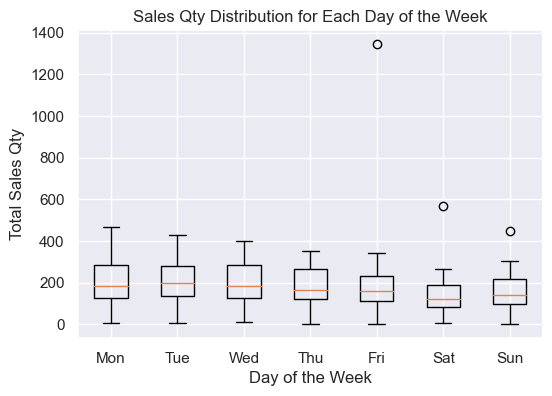

In [33]:
sales_Q_data = [
    monday_sales_Q, tuesday_sales_Q, wednesday_sales_Q,
    thursday_sales_Q, friday_sales_Q, saturday_sales_Q, sunday_sales_Q
]

# Plotting the boxplot
plt.figure(figsize=(6, 4))
plt.boxplot(sales_Q_data)
plt.title('Sales Qty Distribution for Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales Qty')
plt.xticks(range(1, 8), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.show()

In [34]:
sales_day.describe().T

count          mean           std   min       25%  \
Total_Sales       612.0  21603.755082  12316.810305  10.9  12822.23   
Total_Qty         612.0    180.060458    103.830600   1.0    110.00   
Revenue_per_Item  612.0    121.336340     25.661987  10.9    107.54   
Order_Size        612.0      1.143464      0.097135   1.0      1.11   

                        50%        75%        max  
Total_Sales       20098.560  28726.275  149916.58  
Total_Qty           167.000    243.250    1345.00  
Revenue_per_Item    117.225    129.890     270.38  
Order_Size            1.140      1.170       3.00

#### 2.3.1.3 Sales trend by product category

In [38]:
## Sales($)

product = pd.DataFrame(df.groupby(by=['Year','Month',"product_category_name_english"])['product_sales_amt'].sum().round(3))
product = product.reset_index()
product = product.pivot(index = 'product_category_name_english', columns = ["Year",'Month'], values = 'product_sales_amt')
product['Total'] = product.sum(axis=1)
product.sort_values(by="Total", ascending=False)

Year                             2016                   2017            \
Month                               9       10  12         1         2   
product_category_name_english                                            
health_beauty                  134.97  3439.25 NaN  12366.44  22059.92   
watches_gifts                     NaN  2711.07 NaN   8086.52  10992.39   
bed_bath_table                    NaN   478.99 NaN   3804.36  15572.13   
sports_leisure                    NaN  2012.15 NaN   9212.14  15629.98   
computers_accessories             NaN   669.02 NaN   3924.14  11319.09   
...                               ...      ...  ..       ...       ...   
flowers                           NaN      NaN NaN       NaN       NaN   
home_comfort_2                    NaN      NaN NaN     72.80       NaN   
cds_dvds_musicals                 NaN      NaN NaN       NaN       NaN   
fashion_childrens_clothes         NaN      NaN NaN       NaN       NaN   
security_and_services             NaN      NaN NaN    183.29       NaN   

Year                                                                   \
Month                                 3         4         5         6   
product_category_name_english                                           
health_beauty                  25652.45  22156.34  46340.06  31676.81   
watches_gifts                  24892.38  23336.09  36619.48  27337.63   
bed_bath_table                 25120.02  24092.89  32684.60  33803.23   
sports_leisure                 25472.89  22997.06  34101.73  32066.93   
computers_accessories          28078.80  18353.46  44759.39  36193.70   
...                                 ...       ...       ...       ...   
flowers                             NaN       NaN       NaN       NaN   
home_comfort_2                   342.88     12.90       NaN     12.90   
cds_dvds_musicals                   NaN       NaN       NaN       NaN   
fashion_childrens_clothes           NaN       NaN    110.00    110.00   
security_and_services               NaN       NaN       NaN       NaN   

Year                                     ...                2018             \
Month                                 7  ...        12         1          2   
product_category_name_english            ...                                  
health_beauty                  34239.45  ...  60688.75  71405.60   84576.55   
watches_gifts                  33702.42  ...  69556.92  73521.24   60725.31   
bed_bath_table                 62786.96  ...  50081.16  75408.13   60366.29   
sports_leisure                 36618.83  ...  58722.48  86172.83   74540.95   
computers_accessories          38176.22  ...  37428.67  80503.87  100131.99   
...                                 ...  ...       ...       ...        ...   
flowers                             NaN  ...     82.70    284.60     134.48   
home_comfort_2                    12.90  ...       NaN       NaN      38.70   
cds_dvds_musicals                225.00  ...     65.00       NaN        NaN   
fashion_childrens_clothes           NaN  ...       NaN       NaN        NaN   
security_and_services               NaN  ...       NaN       NaN        NaN   

Year                                                                     \
Month                                 3         4          5          6   
product_category_name_english                                             
health_beauty                  84488.57  91058.45   94534.38  106745.72   
watches_gifts                  95661.18  88623.07  119364.98   85027.57   
bed_bath_table                 67786.35  71379.61   71265.07   70857.08   
sports_leisure                 81656.96  65793.52   59209.92   44916.01   
computers_accessories          84708.39  57370.90   50631.83   41806.37   
...                                 ...       ...        ...        ...   
flowers                           89.67    158.40      16.40     108.00   
home_comfort_2                    34.99     12.90        NaN      25.80   
cds_dvds

In [40]:
# Order qty(#)

product = pd.DataFrame(df.groupby(by=['Year','Month',"product_category_name_english"])['product_order_size'].sum().round(3))
product = product.reset_index()
product = product.pivot(index = 'product_category_name_english', columns = ['Year','Month'], values = 'product_order_size')
product['Total'] = product.sum(axis=1)
product.sort_values(by="Total", ascending=False)

Year                                 2016             2017                \
Month                                   9    10  12      1      2      3   
product_category_name_english                                              
bed_bath_table                        NaN   8.0 NaN   46.0  157.0  279.0   
health_beauty                         3.0  40.0 NaN   82.0  154.0  208.0   
sports_leisure                        NaN  17.0 NaN   74.0  149.0  190.0   
furniture_decor                       NaN  65.0 NaN  177.0  257.0  315.0   
computers_accessories                 NaN  12.0 NaN   31.0  100.0  171.0   
...                                   ...   ...  ..    ...    ...    ...   
cds_dvds_musicals                     NaN   NaN NaN    NaN    NaN    NaN   
kitchen_laptops_and_food_preparators  NaN   NaN NaN    NaN    NaN    NaN   
pc_gamer                              NaN   NaN NaN    NaN    NaN    NaN   
fashion_childrens_clothes             NaN   NaN NaN    NaN    NaN    NaN   
security_and_services                 NaN   NaN NaN    1.0    NaN    NaN   

Year                                                              ...         \
Month                                     4      5      6      7  ...     12   
product_category_name_english                                     ...          
bed_bath_table                        271.0  361.0  369.0  569.0  ...  546.0   
health_beauty                         180.0  284.0  254.0  308.0  ...  460.0   
sports_leisure                        203.0  305.0  269.0  375.0  ...  484.0   
furniture_decor                       191.0  271.0  230.0  314.0  ...  378.0   
computers_accessories                 132.0  309.0  254.0  320.0  ...  284.0   
...                                     ...    ...    ...    ...  ...    ...   
cds_dvds_musicals                       NaN    NaN    NaN    5.0  ...    1.0   
kitchen_laptops_and_food_preparators    NaN    NaN    NaN    NaN  ...    NaN   
pc_gamer                                2.0    1.0    1.0    NaN  ...    NaN   
fashion_childrens_clothes               NaN    1.0    1.0    NaN  ...    NaN   
security_and_services                   NaN    NaN    NaN    NaN  ...    NaN   

Year                                   2018                              \
Month                                     1      2      3      4      5   
product_category_name_english                                             
bed_bath_table                        836.0  685.0  777.0  736.0  740.0   
health_beauty                         619.0  650.0  656.0  685.0  751.0   
sports_leisure                        642.0  637.0  732.0  586.0  489.0   
furniture_decor                       595.0  422.0  583.0  586.0  597.0   
computers_accessories                 688.0  971.0  750.0  526.0  453.0   
...                                     ...    ...    ...    ...    ...   
cds_dvds_musicals                       NaN    NaN    NaN    1.0    NaN   
kitchen_laptops_and_food_preparators    NaN    NaN    NaN    NaN    2.0   
pc_gamer                                NaN    1.0    NaN    NaN    NaN   
fashion_childrens_clothes               NaN    NaN    2.0    NaN    NaN   
security_and_services                   NaN    NaN    NaN    NaN    NaN   

Year                                                         Total  
Month                                     6      7      8           
product_category_name_english                                       
bed_bath_table                        764.0  617.0  655.0  10953.0  
health_beauty                         875.0  770.0  835.0   9465.0  
sports_leisure                        419.0  460.0  471.0   8431.0  
furniture_decor                       402.0  436.0  430.0   8160.0  
computers_accessories                 401.0  418.0  415.0   7644.0  
...                                     ...    ...    ...      ...  
cds_dvds_musicals                       NaN    NaN    NaN     14.0  
kitchen_laptops_and_food_preparators    NaN    8.0    4.0     14.0  
pc_g

#### 2.3.1.4 Product price chart

In [48]:
product_price=df[['Year','Month', 'product_category_name_english', 'product_id', 'price']].drop_duplicates()
product_price

Year  Month product_category_name_english  \
0       2017     10                    housewares   
1       2018      7                     perfumery   
2       2018      8                          auto   
3       2017     11                      pet_shop   
4       2018      2                    stationery   
...      ...    ...                           ...   
100190  2017      2               furniture_decor   
100191  2017      3                 health_beauty   
100192  2018      2                          baby   
100193  2017      8             home_appliances_2   
100195  2018      3                 health_beauty   

                              product_id   price  
0       87285b34884572647811a353c7ac498a   29.99  
1       595fac2a385ac33a80bd5114aec74eb8  118.70  
2       aa4383b373c6aca5d8797843e5594415  159.90  
3       d0b61bfb1de832b15ba9d266ca96e5b0   45.00  
4       65266b2da20d04dbe00c5c2d3bb7859e   19.90  
...                                  ...     ...  
100190  ea73128566d1b082e5101ce46f8107c7  139.90  
100191  ac35486adb7b02598c182c2ff2e05254   72.00  
100192  f1d4ce8c6dd66c47bbaa8c6781c2a923  174.90  
100193  b80910977a37536adeddd63663f916ad  205.99  
100195  006619bbed68b000c8ba3f8725d5409e   68.50  

[63249 rows x 5 columns]

In [49]:
product_price.to_csv('price_chart', sep=',', index=False, encoding='utf-8')

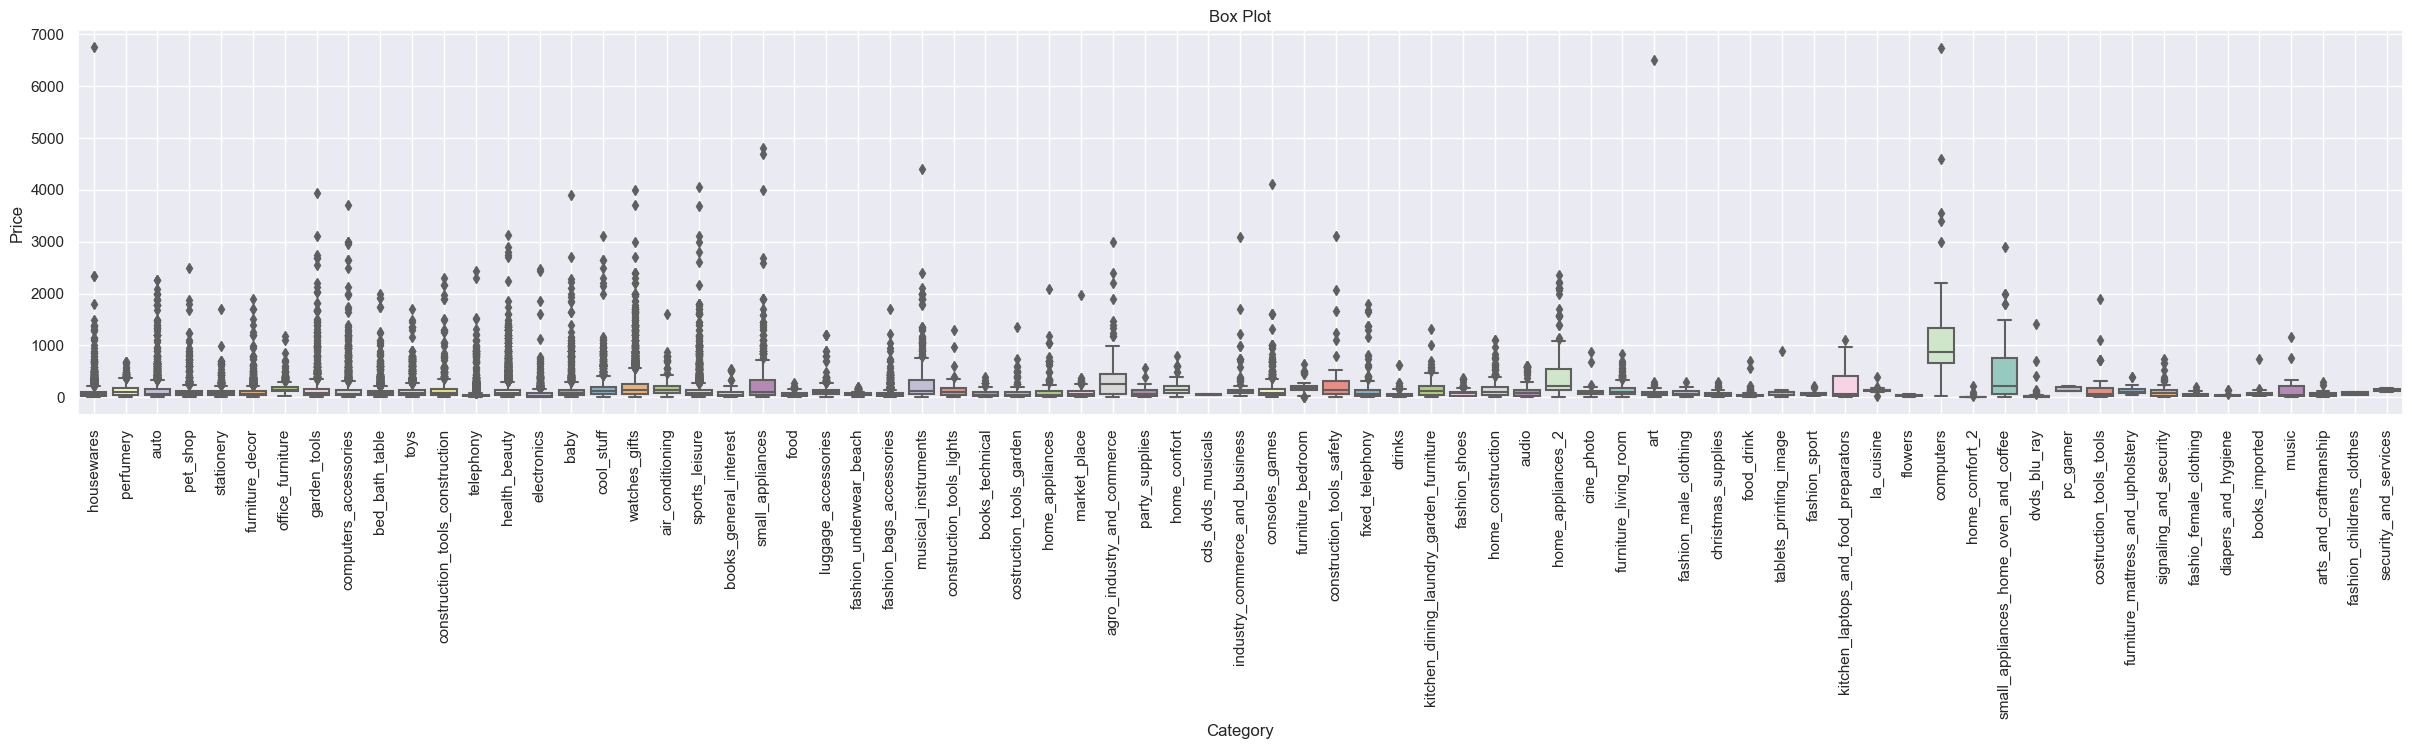

In [50]:
# Creating a box plot
plt.figure(figsize=(30, 5))
sns.boxplot(x='product_category_name_english', y='price', data=product_price, palette="Set3")

plt.title('Box Plot')
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

In [51]:
# Plot a line chart showing the average price of each product category

product_avg = pd.DataFrame(
    (product_price.groupby(['Year','Month', 'product_category_name_english'])['price'].sum())/
    (product_price.groupby(['Year','Month', 'product_category_name_english'])['product_id'].nunique())
).reset_index()

product_avg.columns = ['Year','Month', 'product_category_name_english', 'Avg_Price']

product_avg_pivot = product_avg.pivot(index=['Year','Month'], columns='product_category_name_english', values='Avg_Price')

product_avg_pivot

product_category_name_english  agro_industry_and_commerce  air_conditioning  \
Year Month                                                                    
2016 9                                                NaN               NaN   
     10                                               NaN        199.930000   
     12                                               NaN               NaN   
2017 1                                          21.990000        171.266667   
     2                                          57.445000        255.580000   
     3                                          40.995000        395.675714   
     4                                                NaN        304.321667   
     5                                         506.650000        137.645000   
     6                                        1390.000000        185.920000   
     7                                        1180.000000        279.220000   
     8                                          22.000000        232.027500   
     9                                         531.996667        255.025000   
     10                                        670.056000        223.022857   
     11                                        935.427143        201.473571   
     12                                        560.542857        222.933333   
2018 1                                         391.044000        168.010625   
     2                                         309.209091        215.076667   
     3                                         265.791667        113.138667   
     4                                         386.070000        144.646471   
     5                                         468.535714        126.412500   
     6                                         375.225000        286.112500   
     7                                         273.538182        168.632857   
     8                                         296.014615        196.300000   

product_category_name_english          art  arts_and_craftmanship       audio  \
Year Month                                                                      
2016 9                                 NaN                    NaN         NaN   
     10                                NaN                    NaN   78.495000   
     12                                NaN                    NaN         NaN   
2017 1                                 NaN                    NaN         NaN   
     2                                 NaN                    NaN   29.700000   
     3                           48.866667                    NaN   91.112857   
     4                          119.900000                    NaN   82.740000   
     5                         1371.470000              21.990000  134.853333   
     6                           50.550000                    NaN  144.333333   
     7                          128.916667             129.900000  128.758000   
     8                           77.450000                    NaN  160.283333   
     9                          129.513333                    NaN  108.073750   
     10                         116.350000                    NaN  110.554444   
     11                          75.000000                    NaN  123.005833   
     12                          38.416667                    NaN  121.848000   
2018 1                          145.840000                    NaN  183.315000   
     2                           93.296667                    NaN  276.227143   
     3                           76.916667                    NaN  441.611429   
     4                           89.997778              15.990000  141.753000   
     5                           73.259000              89.800000  228.355714   
     6                           96.574000                    NaN  156.931667   
     7                           75.840000              43.954444  149.967500   
     8                          115.370000              96.908750  197.920000   

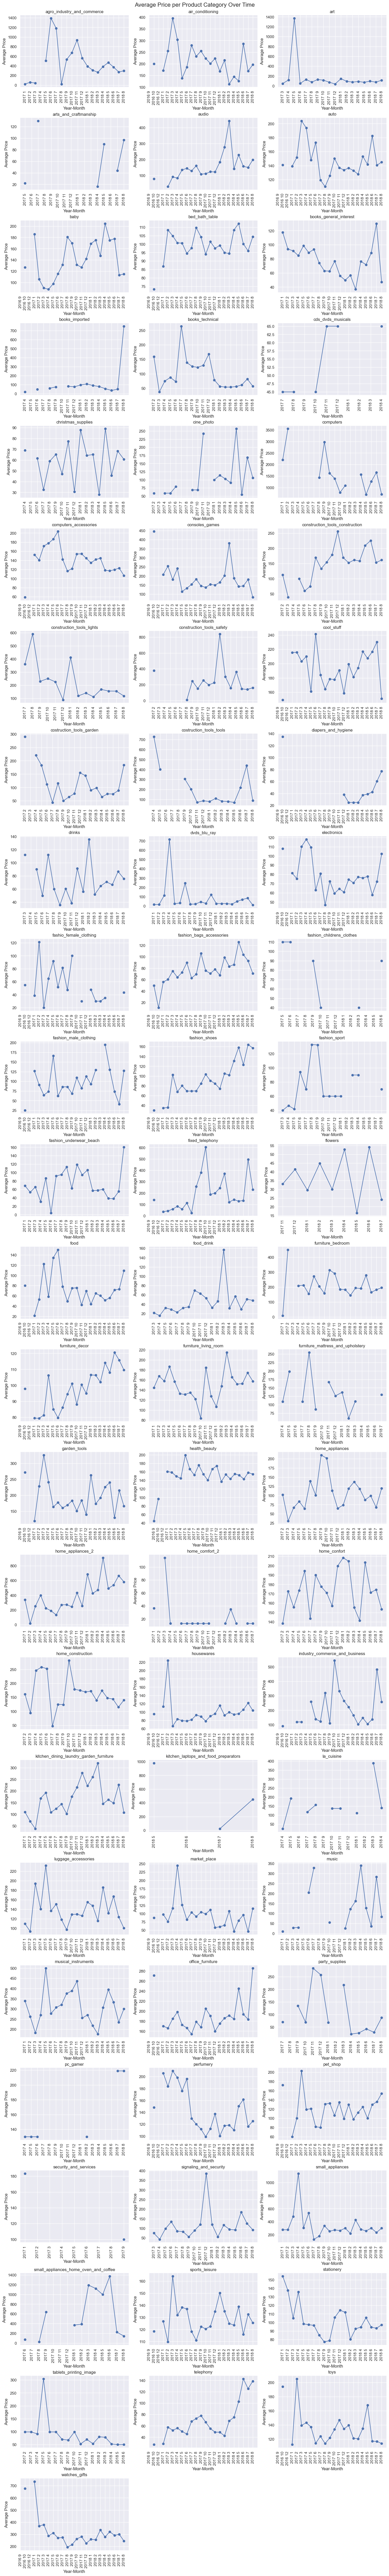

In [52]:
product_avg_pivot_flat_index = [' '.join(map(str, idx)) for idx in product_avg_pivot.index]

categories = product_avg_pivot.columns
n_categories = len(categories)
ncols = 3
nrows = -(-n_categories // ncols)  

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 4*nrows), constrained_layout=True)
axes = axes.flatten()

for i, category in enumerate(categories):
    axes[i].plot(product_avg_pivot_flat_index, product_avg_pivot[category], marker='o', label=category)
    axes[i].set_title(category)
    axes[i].set_xlabel('Year-Month')
    axes[i].set_ylabel('Average Price')
    axes[i].grid(True)
    axes[i].tick_params(axis='x', rotation=90)  

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.suptitle('Average Price per Product Category Over Time', fontsize=16)
plt.show()

In [53]:
# Check the correlations between the product unit price and the product sales qty

sales_qty_table1 = df.groupby(['Year','Month', 'product_category_name_english'])['product_order_size'].sum().reset_index()

merged_data = pd.merge(sales_qty_table1, product_avg, 
                       on=['Year','Month', 'product_category_name_english'], 
                       how='inner')

correlations = merged_data['product_order_size'].corr(merged_data['Avg_Price'])
print(correlations)

-0.062465750317256215


### 2.3.2 Customer Information

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100196 entries, 0 to 100195
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       100196 non-null  object        
 1   customer_id                    100196 non-null  object        
 2   order_status                   100196 non-null  object        
 3   order_purchase_timestamp       100196 non-null  object        
 4   order_estimated_delivery_date  100196 non-null  datetime64[ns]
 5   product_id                     100196 non-null  object        
 6   seller_id                      100196 non-null  object        
 7   shipping_limit_date            100196 non-null  datetime64[ns]
 8   price                          100196 non-null  float64       
 9   freight_value                  100196 non-null  float64       
 10  customer_unique_id             100196 non-null  object        
 11  

In [56]:
df['customer_id'].nunique()

96478

In [57]:
df['customer_unique_id'].nunique()

93358

#### 2.3.2.1 Sales by customer state

In [58]:
sales_by_state = df.groupby(['Year','Month','customer_state'])['product_order_size'].sum().reset_index(name='sales qty')

pivot_table = pd.DataFrame(sales_by_state.pivot(index='customer_state', columns=['Year','Month'], values='sales qty'))
pivot_table['Total'] = pivot_table.sum(axis=1)
pivot_table.sort_values('Total', ascending = False)

column_totals = pivot_table.sum(axis=0).rename('Total')
pivot_table = pivot_table.append(column_totals)
pivot_table.sort_values(by='Total', ascending=False, inplace=True)  

pivot_table

C:\Users\JIYOON JUNG\AppData\Local\Temp\ipykernel_20176\164247834.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pivot_table = pivot_table.append(column_totals)


Year           2016               2017                                  \
Month             9     10   12      1       2       3       4       5   
customer_state                                                           
Total           3.0  313.0  1.0  913.0  1858.0  2897.0  2569.0  4004.0   
SP              3.0  107.0  NaN  352.0   667.0  1093.0   977.0  1535.0   
RJ              NaN   46.0  NaN  103.0   266.0   418.0   362.0   542.0   
MG              NaN   39.0  NaN  130.0   274.0   402.0   300.0   454.0   
RS              NaN   17.0  NaN   63.0   111.0   157.0   143.0   233.0   
PR              NaN   29.0  1.0   67.0   127.0   136.0   124.0   242.0   
SC              NaN   13.0  NaN   34.0    62.0   117.0   117.0   166.0   
BA              NaN    3.0  NaN   29.0    62.0   103.0    95.0   144.0   
DF              NaN    8.0  NaN   15.0    22.0    61.0    40.0    66.0   
GO              NaN    7.0  NaN   34.0    26.0    52.0    45.0    93.0   
ES              NaN    3.0  NaN    9.0    36.0    51.0    49.0   103.0   
PE              NaN    6.0  NaN    9.0    21.0    40.0    37.0    70.0   
CE              NaN    6.0  NaN    8.0    14.0    27.0    44.0    66.0   
PA              NaN    6.0  NaN   10.0    27.0    41.0    41.0    35.0   
MT              NaN    2.0  NaN   13.0    20.0    22.0    27.0    40.0   
MS              NaN    NaN  NaN    1.0    12.0    22.0    17.0    28.0   
MA              NaN    9.0  NaN    6.0    11.0    27.0    27.0    32.0   
PB              NaN    1.0  NaN    2.0    11.0    18.0    22.0    19.0   
PI              NaN    1.0  NaN    7.0    11.0    16.0    11.0    27.0   
RN              NaN    5.0  NaN    5.0    10.0    13.0    12.0    20.0   
AL              NaN    1.0  NaN    3.0    12.0    10.0    22.0    27.0   
SE              NaN    3.0  NaN    4.0    15.0    27.0    14.0    12.0   
TO              NaN    NaN  NaN    2.0     7.0     8.0    16.0    19.0   
RO              NaN    NaN  NaN    3.0    12.0    22.0     7.0     8.0   
AM              NaN    NaN  NaN    NaN     8.0     6.0    13.0     8.0   
AC              NaN    NaN  NaN    4.0     6.0     2.0     5.0     8.0   
AP              NaN    NaN  NaN    NaN     6.0     4.0     NaN     4.0   
RR              NaN    1.0  NaN    NaN     2.0     2.0     2.0     3.0   

Year                            ...            2018                          \
Month                6       7  ...      12       1       2       3       4   
customer_state                  ...                                           
Total           3489.0  4416.0  ...  6187.0  8037.0  7518.0  8017.0  7827.0   
SP              1432.0  1781.0  ...  2598.0  3379.0  3027.0  3410.0  3488.0   
RJ               434.0   622.0  ...   835.0   977.0  1015.0   996.0   936.0   
MG               395.0   481.0  ...   773.0   968.0   889.0   968.0   882.0   
RS               253.0   272.0  ...   314.0   417.0   424.0   454.0   388.0   
PR               182.0   225.0  ...   280.0   428.0   377.0   422.0   454.0   
SC               124.0   178.0  ...   205.0   353.0   298.0   286.0   306.0   
BA               122.0   154.0  ...   207.0   257.0   247.0   275.0   239.0   
DF                83.0    97.0  ...   151.0   151.0   189.0   164.0   166.0   
GO                79.0    83.0  ...   136.0   169.0   172.0   169.0   145.0   
ES                90.0    94.0  ...   112.0   160.0   164.0   145.0   158.0   
PE                42.0    81.0  ...   116.0   110.0   130.0   114.0   125.0   
CE                45.0    60.0  ...    83.0    94.0    98.0   112.0   102.0   
PA                36.0    42.0  ...    61.0    76.0    68.0    74.0    76.0   
MT                24.0    41.0  ...    53.0    95.0    71.0    63.0    68.0   
MS                31.0    28.0  ...    38.0    79.0    77.0    65.0    52.0   
MA                15.0    39.0  ...    44.0    63.0    59.0    62.0    49.0   
PB                24.0    33.0  ...    41.0    33.0    43.0    51.0    29.0   
PI                14.0    21.0  ...    25.0   

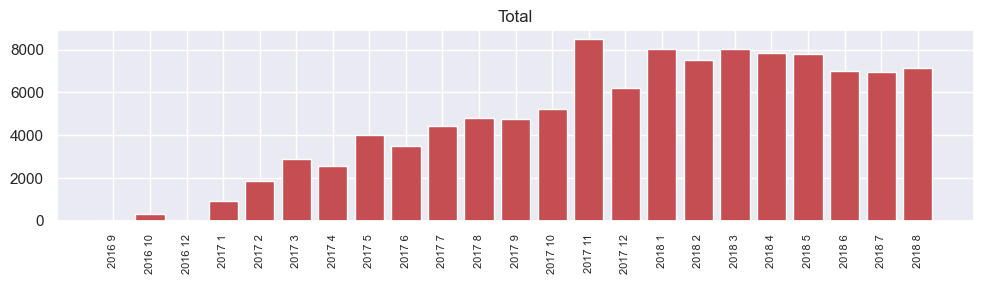

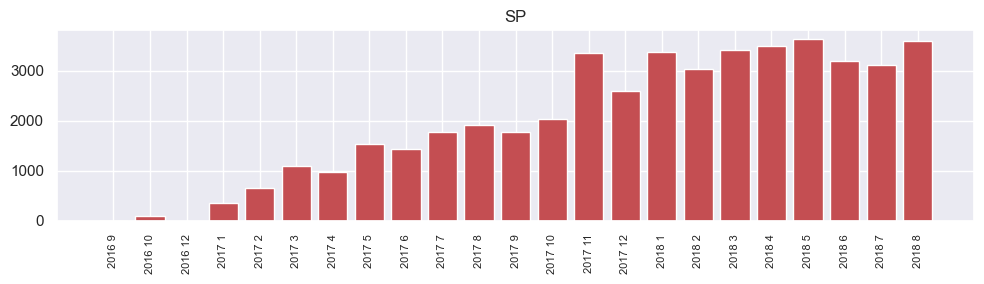

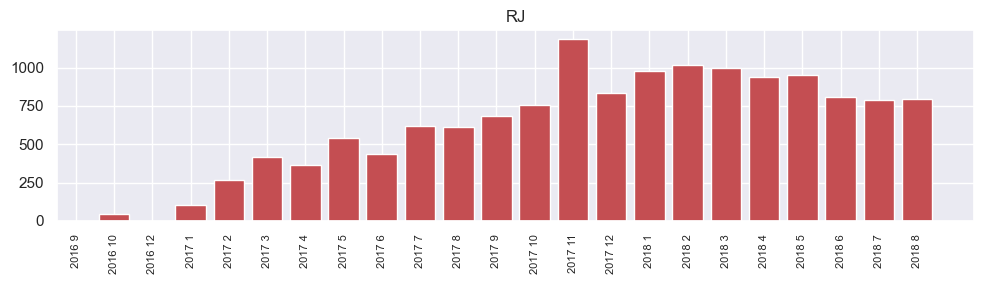

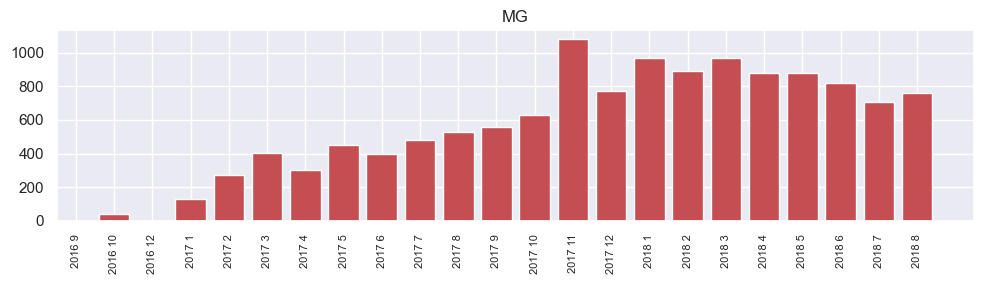

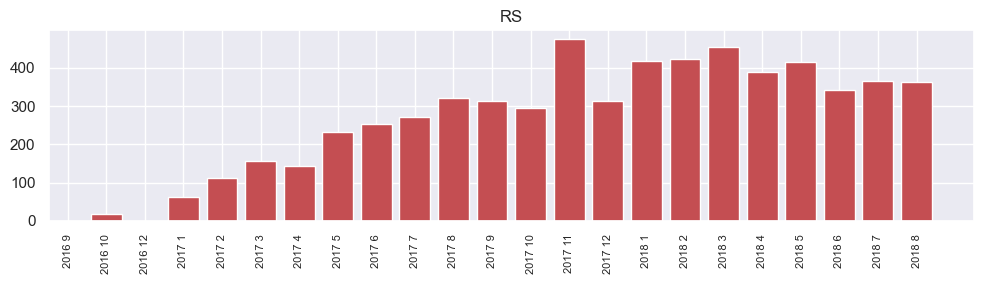

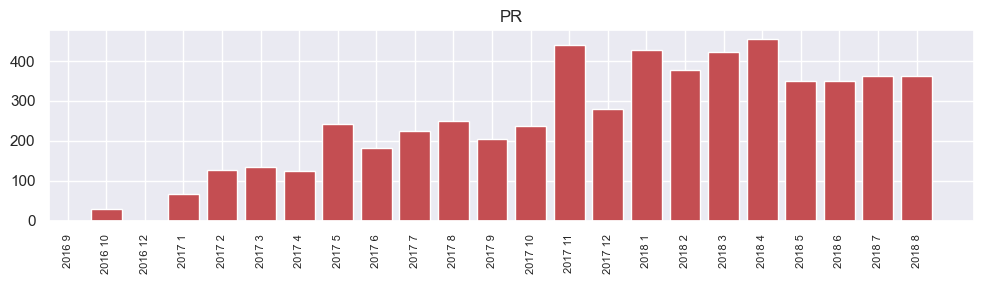

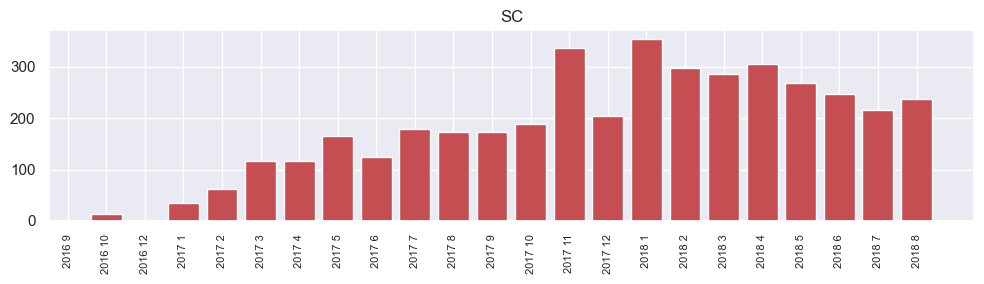

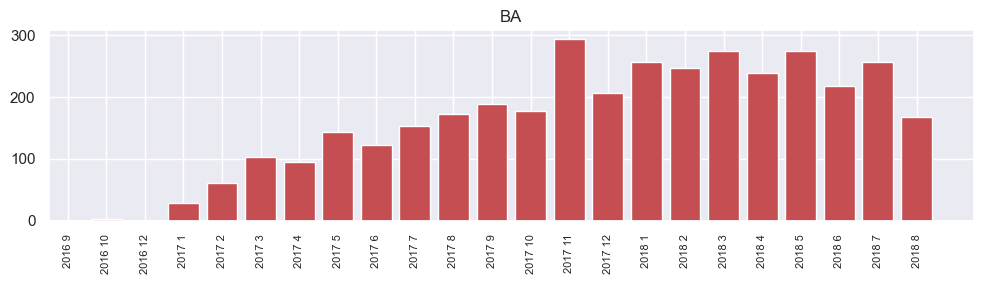

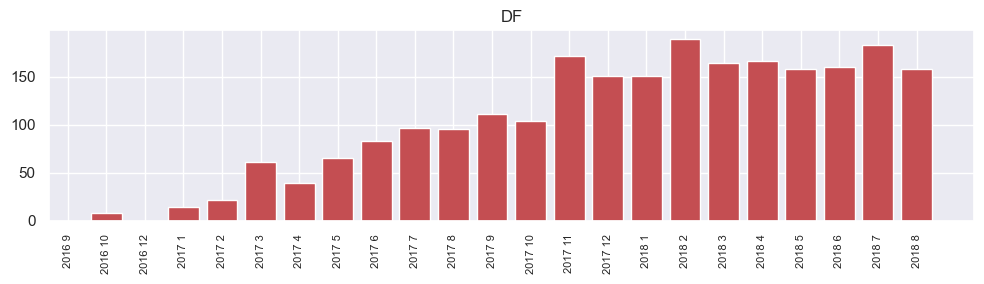

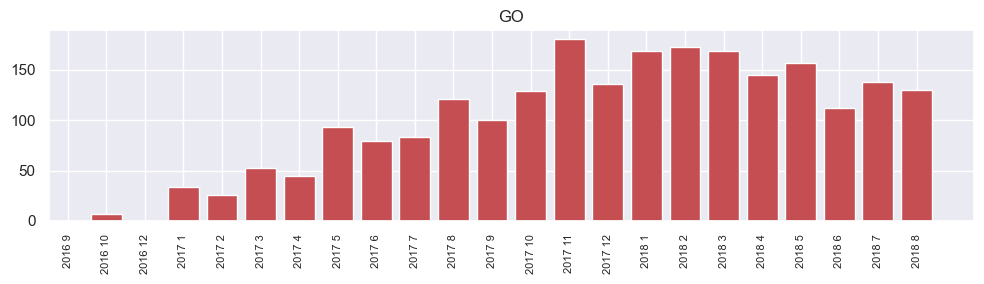

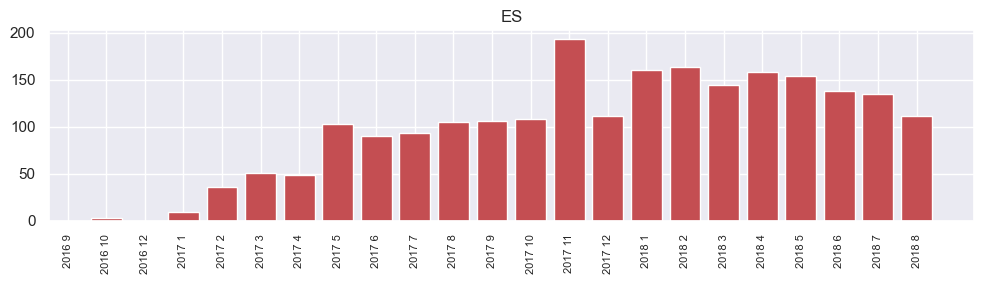

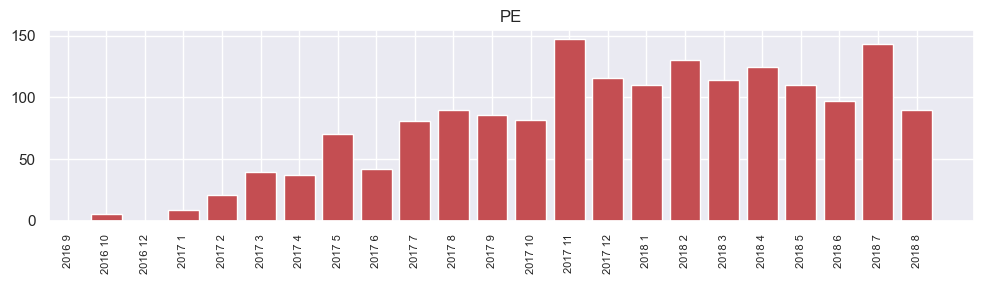

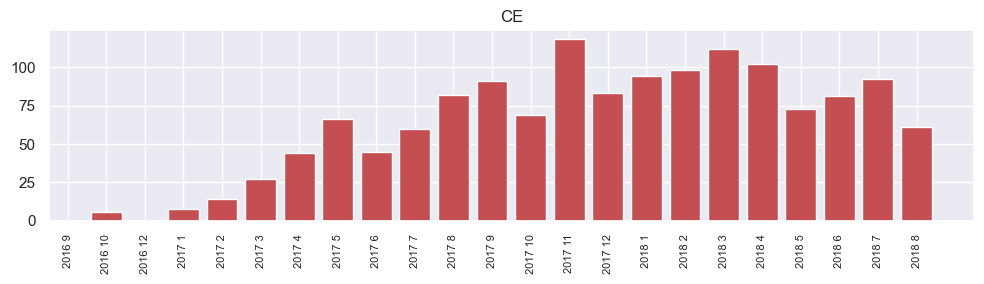

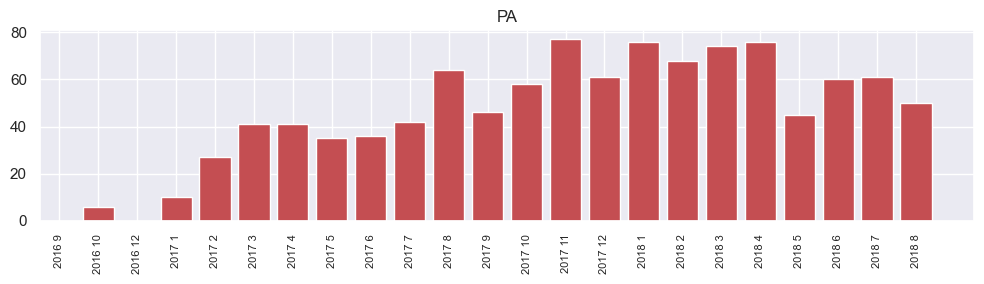

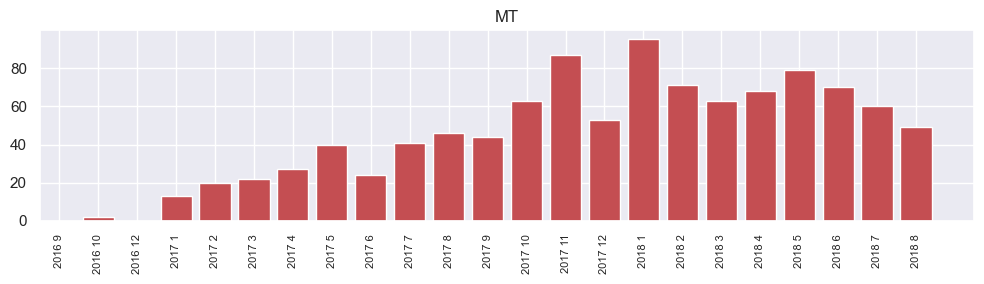

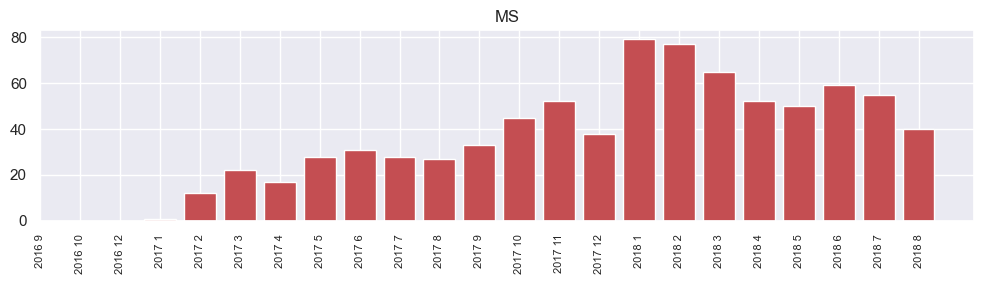

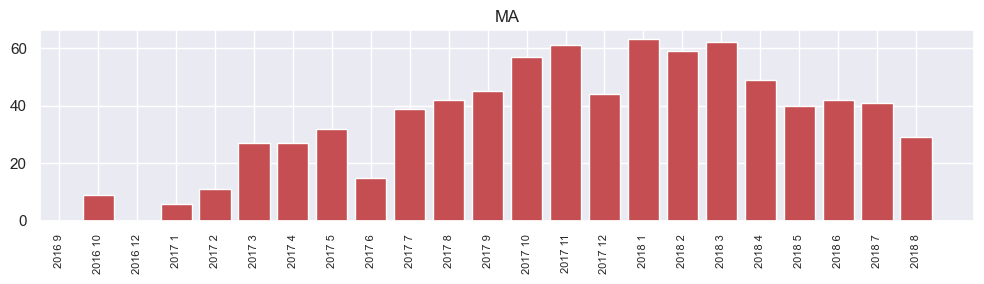

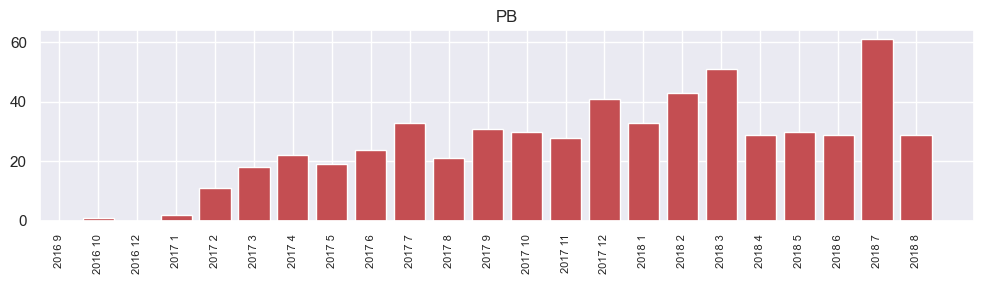

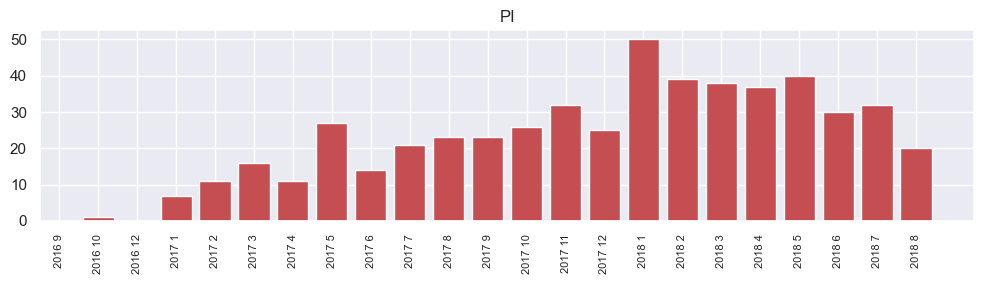

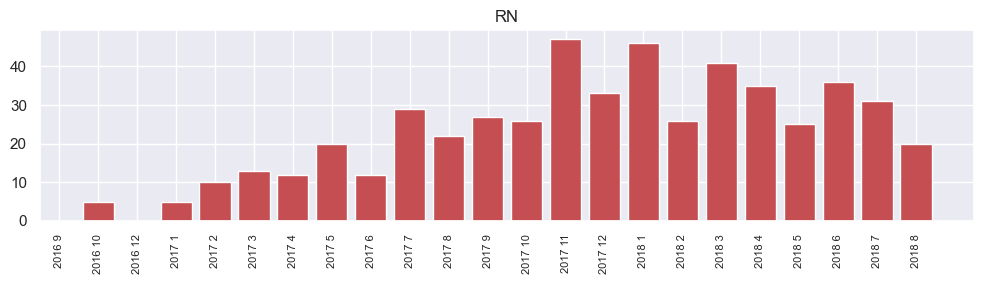

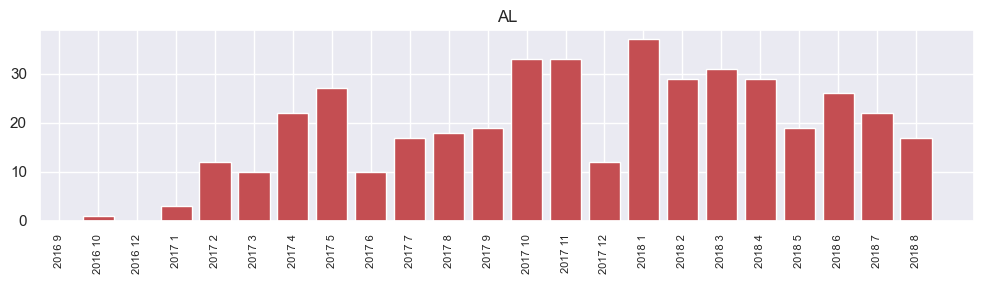

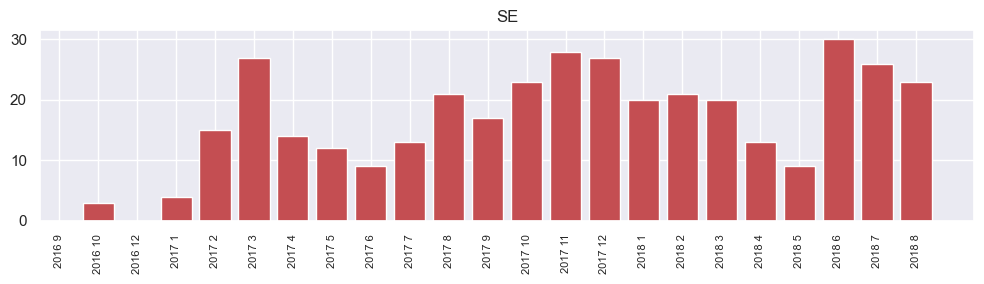

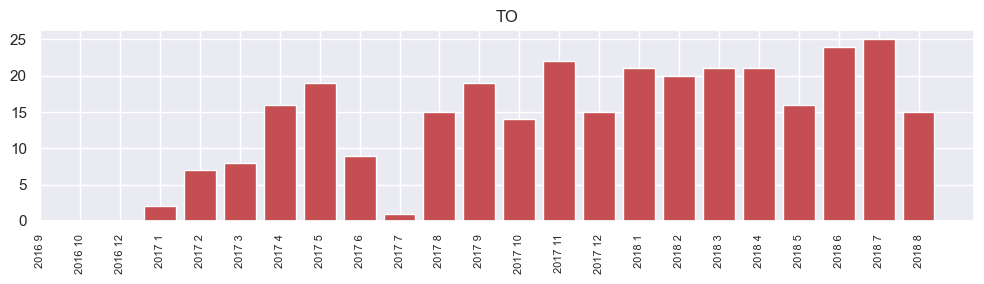

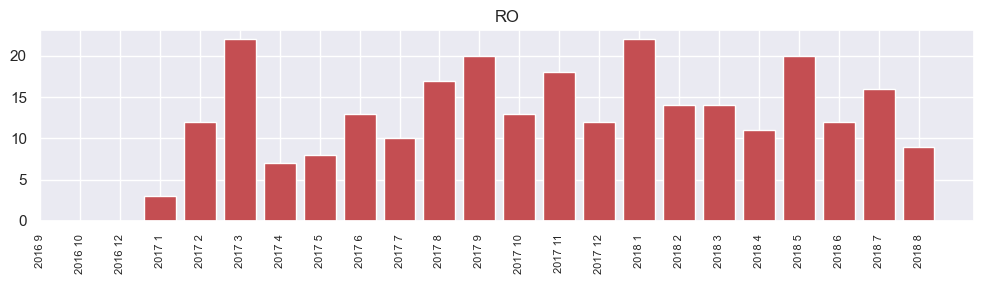

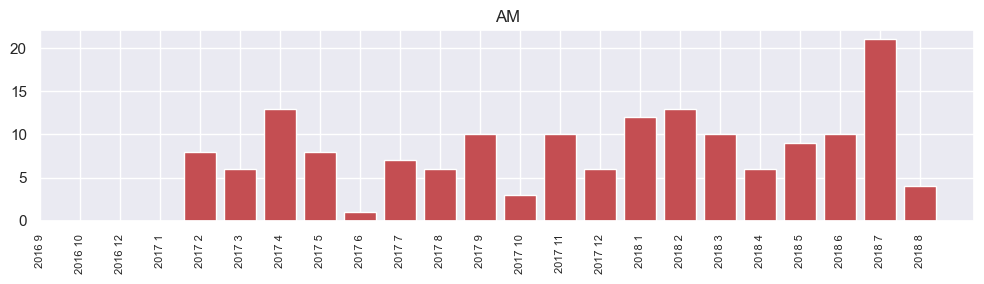

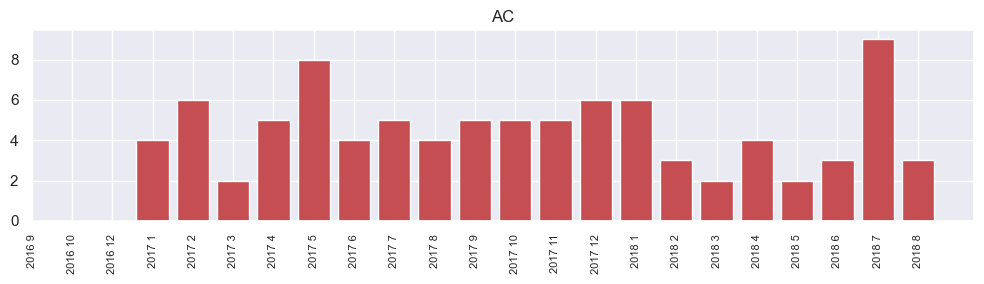

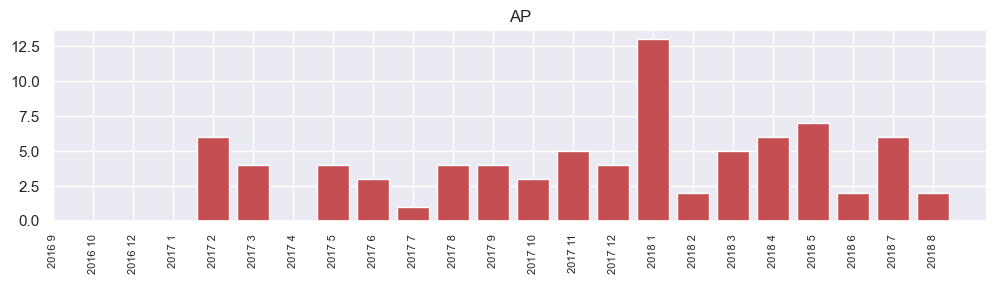

In [59]:
pivot_table.columns = [' '.join(map(str, col)).strip() for col in pivot_table.columns.values]

for i in range(1, len(pivot_table)):
    data_for_plotting = pivot_table.iloc[i-1, :-1]  
    x_values = data_for_plotting.index.tolist()  
    y_values = data_for_plotting.values.tolist()
    
    fig, ax = plt.subplots(figsize=(10, 3))
    ax.bar(x_values, y_values, color='r')
    
    # Setting x-ticks and labels
    ax.set_xticks(x_values)
    ax.set_xticklabels(x_values, rotation=90, size=8)  
    
    # Setting title
    ax.set_title(pivot_table.index[i-1])
    
    plt.tight_layout()
    plt.show()

#### 2.3.2.2 Sales by customer city

In [63]:
import pandas as pd

# Assuming sales_by_state_city is prepared as described
sales_by_state_city = df.groupby(['customer_state', 'customer_city', 'Year','Month'])['product_order_size'].sum().reset_index(name='sales_qty')

# Creating pivot table
pivot_table = pd.DataFrame(sales_by_state_city.pivot(index=['customer_state', 'customer_city'], columns=['Year','Month'], values='sales_qty'))

# Calculating the total counts for each state and city
pivot_table['Total'] = pivot_table.sum(axis=1)

# Store 'Total' column separately and drop it from the pivot_table for now
total_col = pivot_table['Total']
pivot_table.drop(columns=['Total'], inplace=True)

# Convert the column index to a MultiIndex to facilitate sorting
pivot_table.columns = pd.MultiIndex.from_tuples([(int(year), int(month)) for year, month in pivot_table.columns], names=['Year', 'Month'])

# Sort the pivot table's columns by 'Year' and then 'Month'
pivot_table = pivot_table.sort_index(axis=1)

# Append the 'Total' column back to the sorted pivot_table
pivot_table['Total'] = total_col

# Calculating column totals (exclude 'Total' for accurate summing)
column_totals = pivot_table.drop(columns=['Total']).sum(axis=0).rename('Total')

# Append column totals as a new row
pivot_table = pivot_table.append(pd.DataFrame(column_totals).T)

# Displaying the pivot table with totals
display(pivot_table)

C:\Users\JIYOON JUNG\AppData\Local\Temp\ipykernel_20176\2028993762.py:14: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  pivot_table.drop(columns=['Total'], inplace=True)
C:\Users\JIYOON JUNG\AppData\Local\Temp\ipykernel_20176\2028993762.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pivot_table = pivot_table.append(pd.DataFrame(column_totals).T)


Year                          2016               2017                          \
Month                            9     10   12      1       2       3       4   
(AC, brasileia)                NaN    NaN  NaN    NaN     3.0     NaN     NaN   
(AC, cruzeiro do sul)          NaN    NaN  NaN    NaN     NaN     NaN     NaN   
(AC, epitaciolandia)           NaN    NaN  NaN    NaN     NaN     NaN     NaN   
(AC, manoel urbano)            NaN    NaN  NaN    NaN     NaN     NaN     NaN   
(AC, porto acre)               NaN    NaN  NaN    NaN     NaN     NaN     1.0   
...                            ...    ...  ...    ...     ...     ...     ...   
(TO, sitio novo do tocantins)  NaN    NaN  NaN    NaN     NaN     NaN     NaN   
(TO, taguatinga)               NaN    NaN  NaN    NaN     NaN     NaN     NaN   
(TO, tocantinopolis)           NaN    NaN  NaN    NaN     NaN     NaN     2.0   
(TO, xambioa)                  NaN    NaN  NaN    NaN     NaN     NaN     NaN   
Total                          3.0  313.0  1.0  913.0  1858.0  2897.0  2569.0   

Year                                                   ...            2018  \
Month                               5       6       7  ...      12       1   
(AC, brasileia)                   NaN     NaN     NaN  ...     NaN     NaN   
(AC, cruzeiro do sul)             NaN     NaN     NaN  ...     2.0     NaN   
(AC, epitaciolandia)              NaN     NaN     NaN  ...     NaN     NaN   
(AC, manoel urbano)               NaN     NaN     NaN  ...     NaN     NaN   
(AC, porto acre)                  NaN     NaN     NaN  ...     NaN     NaN   
...                               ...     ...     ...  ...     ...     ...   
(TO, sitio novo do tocantins)     3.0     NaN     NaN  ...     NaN     NaN   
(TO, taguatinga)                  NaN     NaN     NaN  ...     NaN     1.0   
(TO, tocantinopolis)              NaN     NaN     NaN  ...     1.0     NaN   
(TO, xambioa)                     NaN     NaN     NaN  ...     NaN     NaN   
Total                          4004.0  3489.0  4416.0  ...  6187.0  8037.0   

Year                                                                           \
Month                               2       3       4       5       6       7   
(AC, brasileia)                   NaN     NaN     NaN     NaN     NaN     NaN   
(AC, cruzeiro do sul)             NaN     NaN     NaN     1.0     NaN     NaN   
(AC, epitaciolandia)              NaN     NaN     NaN     NaN     NaN     NaN   
(AC, manoel urbano)               NaN     NaN     NaN     NaN     NaN     NaN   
(AC, porto acre)                  NaN     NaN     NaN     NaN     NaN     NaN   
...                               ...     ...     ...     ...     ...     ...   
(TO, sitio novo do tocantins)     NaN     1.0     NaN     NaN     NaN     NaN   
(TO, taguatinga)                  1.0     NaN     NaN     NaN     NaN     NaN   
(TO, tocantinopolis)              NaN     2.0     NaN     1.0     NaN     NaN   
(TO, xambioa)                     NaN     NaN     NaN     NaN     NaN     NaN   
Total                          7518.0  8017.0  7827.0  7810.0  7010.0  6963.0   

Year                                  Total  
Month                               8        
(AC, brasileia)                   NaN   3.0  
(AC, cruzeiro do sul)             NaN   3.0  
(AC, epitaciolandia)              NaN   1.0  
(AC, manoel urbano)               NaN   1.0  
(AC, porto acre)                  NaN   1.0  
...                               ...   ...  
(TO, sitio novo do tocantins)     NaN   4.0  
(TO, taguatinga)                  NaN   3.0  
(TO, tocantinopolis)              NaN   8.0  
(TO, xambioa)                     1.0   3.0  
Total                          7142.0   NaN  

[4273 rows x 24 columns]